## IMPORTING BASIC LIBRARIES¶

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## DATA LOADING

In [2]:
data = pd.read_csv('players_20.csv',na_filter=['+#'])
pd.set_option('display.max_columns',None)

# Replace special character
data.replace('[!@#\?]','',regex=True,inplace=True)

columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm',
           'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
data[columns]

for colmun in columns:
    data[colmun] = data[colmun].str.split('+',expand=True)[0]
data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  Dribbler, Distance Shooter, Crosser, FK Specia...            RW   
1  Speedster, Dribbler, Distance Shooter, Acrobat...            LW   
2  Speedster, Dribbler, Playmaker  , Crosser, FK ...           CAM   
3                                                NaN            GK   
4                       Speedster, Dribbler, Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

## DATA PREPROCESSING
### 1. HANDLE MISSING VALUES

In [3]:
pd.set_option('display.max_rows',None)
data.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1298
player_tags                   16779
team_position                   240
team_jersey_number              240
loaned_from                   17230
joined                      

### CHECK MISSING VALUES IN PERCENTAGE

In [4]:
def missing_value(data, threshold=50):
    null_value = data.isnull().sum()
    percentage = (data.isnull().sum() / data.isnull().count() * 100)
    null_value = pd.concat([null_value, percentage], axis=1, keys=['Missing values', 'Missing Percentage'])
    null_value = null_value[(null_value['Missing Percentage'] < threshold) & (null_value['Missing values'] > 0)]
    return null_value
result = missing_value(data, threshold=50)
print(result)

                      Missing values  Missing Percentage
release_clause_eur              1298            7.101433
team_position                    240            1.313054
team_jersey_number               240            1.313054
joined                          1288            7.046723
contract_valid_until             240            1.313054
pace                            2036           11.139074
shooting                        2036           11.139074
passing                         2036           11.139074
dribbling                       2036           11.139074
defending                       2036           11.139074
physic                          2036           11.139074
ls                              2036           11.139074
st                              2036           11.139074
rs                              2036           11.139074
lw                              2036           11.139074
lf                              2036           11.139074
cf                             

- Above 50% to 90% missing value and some unique feature also contain missing value so we drop this feature.
- Remaining feature missing value is less than 50% so we impute the missing value.


### CHECKING THE DISTRIBUTION BEFORE IMPUTE MISSING VALUE

### CHECKING THE DISTRIBUTION BEFORE IMPUTE MISSING VALUE

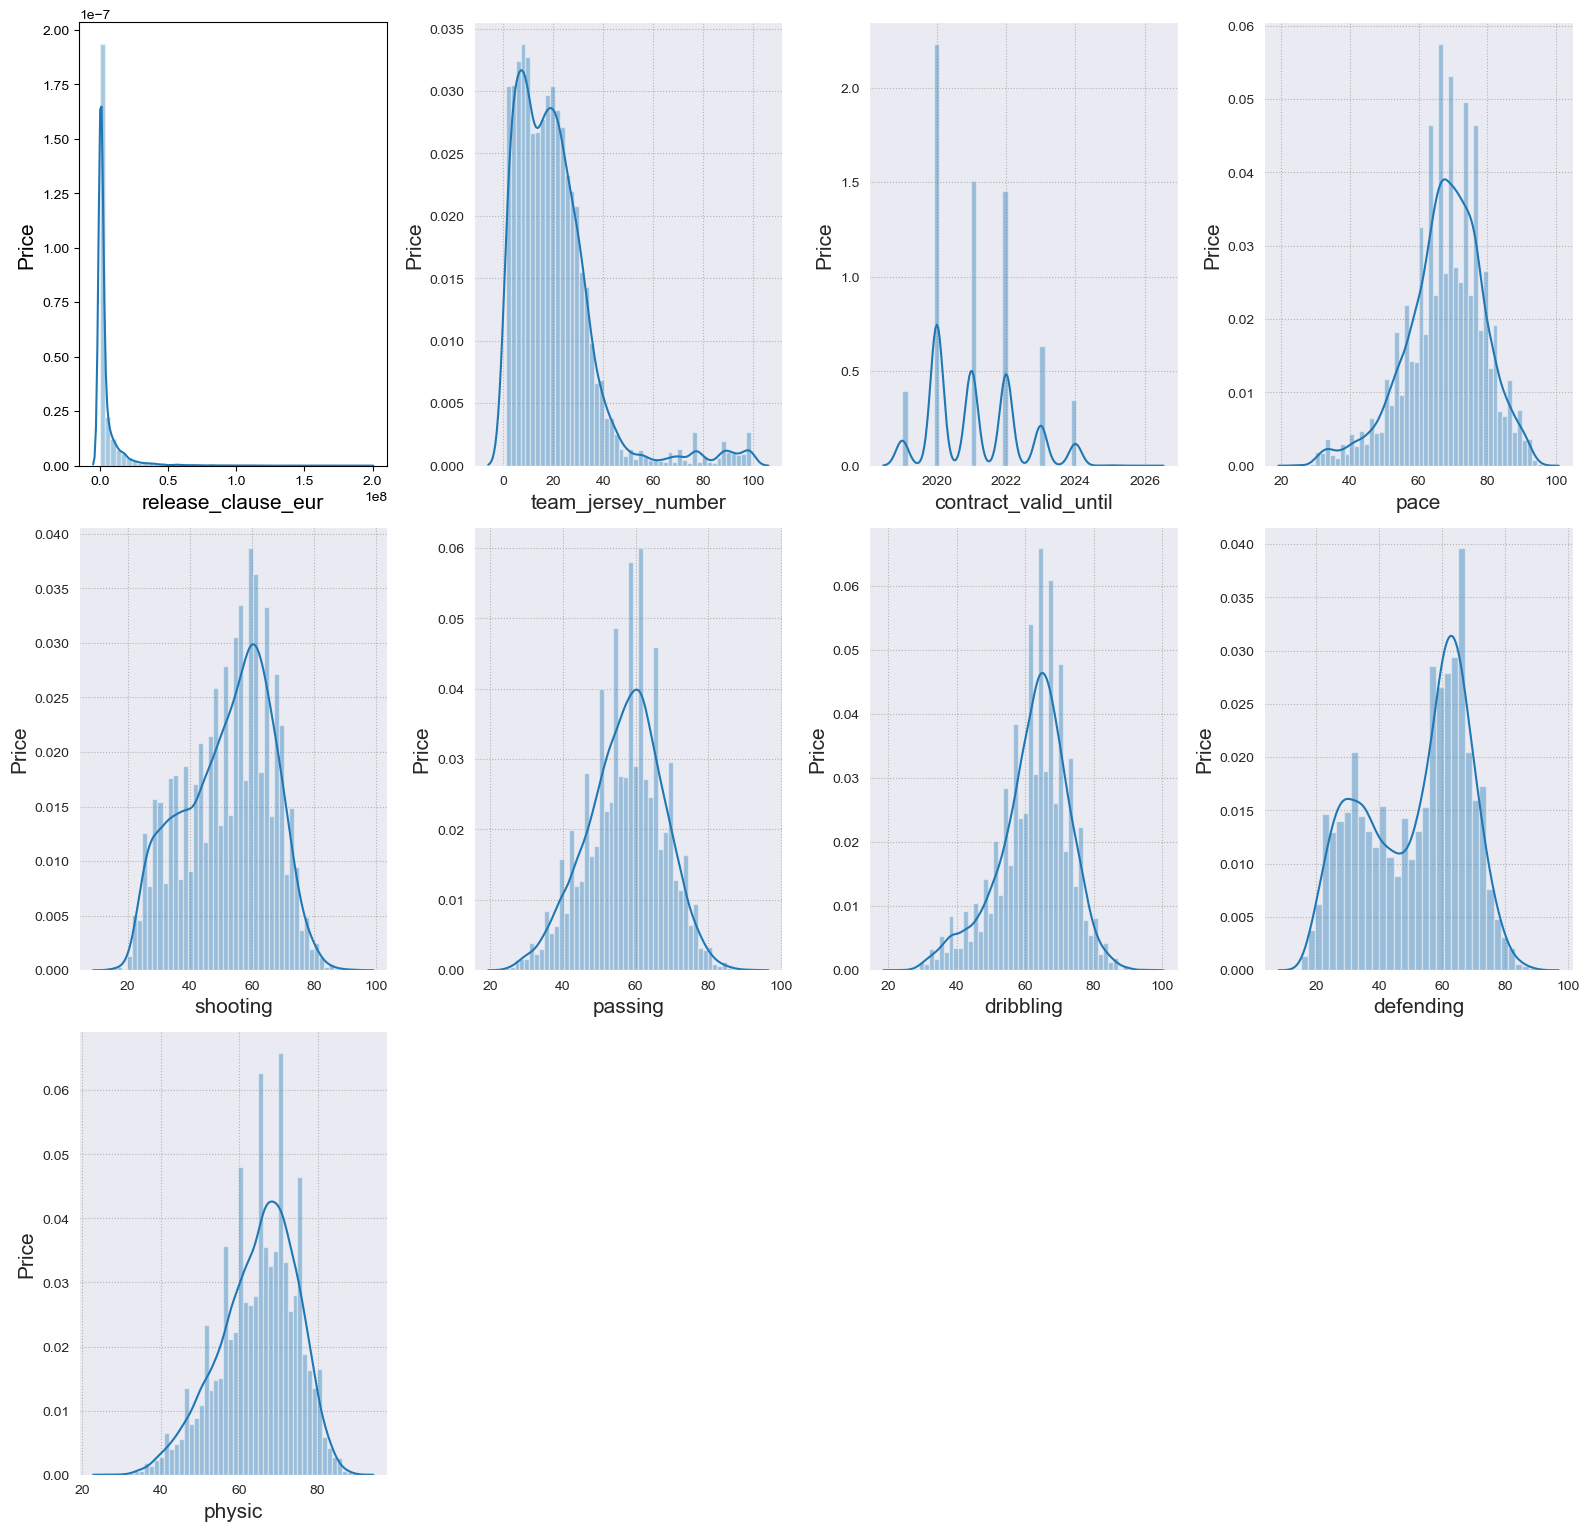

In [5]:
missing_column=["release_clause_eur","team_jersey_number", "contract_valid_until",'pace','shooting','passing','dribbling','defending','physic']
plt.figure(figsize=(16,20),facecolor="white")
plotnumber=1

for column in missing_column:
    if plotnumber<=20:
        plt.subplot(4,4,plotnumber)
        sns.set_style("darkgrid", {"grid.color": ".7", "grid.linestyle": ":"})
        sns.distplot(x=data[column],kde=True)
        plt.xlabel(column,fontsize=15)
        plt.ylabel("Price",fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [6]:
columns_to_impute = ['release_clause_eur','contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

for column in columns_to_impute:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

### CHECK MISSING VALUE AFTER IMPUTATION

In [7]:
for column in columns_to_impute:
    missing_count = data[column].isnull().sum()
    print(f"{column}: {missing_count}")

release_clause_eur: 0
contract_valid_until: 0
pace: 0
shooting: 0
passing: 0
dribbling: 0
defending: 0
physic: 0


### 2.CATEGORICAL

#### 1. TEAM_POSITION

In [8]:
data["team_position"].mode()

0    SUB
Name: team_position, dtype: object

In [10]:
data.loc[data["team_position"].isnull()==True,"team_position"]="SUB"

### 2. HANDLE CATEGORICAL DATA
- Among this data only the preferred foot and team position features are significant while all other features are Unique.
#### 1. PREFERRED FOOT

In [11]:
data["preferred_foot"].value_counts()

Right    13960
Left      4318
Name: preferred_foot, dtype: int64

In [12]:
data["preferred_foot"]=data["preferred_foot"].map({"Right":1,"Left":0})

#### 2. TEAM POSITION

In [13]:
data["team_position"].value_counts()

SUB    8060
RES    2958
GK      662
RCB     660
LCB     660
RB      560
LB      560
ST      458
RCM     411
LCM     411
RM      399
LM      398
CAM     311
RDM     244
LDM     242
RS      195
LS      195
CDM     181
LW      162
RW      161
CB      100
CM       76
RWB      58
LWB      58
RAM      23
LAM      23
RF       19
LF       19
CF       14
Name: team_position, dtype: int64

In [14]:
data.loc[data["team_position"]=="CF","team_position"]=0
data.loc[data["team_position"]=="LF","team_position"]=1
data.loc[data["team_position"]=="RF","team_position"]=2
data.loc[data["team_position"]=="LAM","team_position"]=3
data.loc[data["team_position"]=="RAM","team_position"]=4
data.loc[data["team_position"]=="LWB","team_position"]=5
data.loc[data["team_position"]=="RWB","team_position"]=6
data.loc[data["team_position"]=="CM","team_position"]=7
data.loc[data["team_position"]=="CB","team_position"]=8
data.loc[data["team_position"]=="RW","team_position"]=9
data.loc[data["team_position"]=="LW","team_position"]=10
data.loc[data["team_position"]=="CDM","team_position"]=11
data.loc[data["team_position"]=="LS","team_position"]=12
data.loc[data["team_position"]=="RS","team_position"]=13
data.loc[data["team_position"]=="LDM","team_position"]=14
data.loc[data["team_position"]=="RDM","team_position"]=15
data.loc[data["team_position"]=="CAM","team_position"]=16
data.loc[data["team_position"]=="LM","team_position"]=17
data.loc[data["team_position"]=="RM","team_position"]=18
data.loc[data["team_position"]=="LCM","team_position"]=19
data.loc[data["team_position"]=="RCM","team_position"]=20
data.loc[data["team_position"]=="ST","team_position"]=21
data.loc[data["team_position"]=="LB","team_position"]=22
data.loc[data["team_position"]=="RB","team_position"]=23
data.loc[data["team_position"]=="LCB","team_position"]=24
data.loc[data["team_position"]=="RCB","team_position"]=25
data.loc[data["team_position"]=="GK","team_position"]=26
data.loc[data["team_position"]=="RES","team_position"]=27
data.loc[data["team_position"]=="SUB","team_position"]=28

### 3. HANDLE OUTLIERS
- In this data we are handle only important feature outlier, because the remaining feature is unique or some feature is not reuired to handle outlier

In [16]:
num_data=data.select_dtypes(include=["int64","float64"])
num_data.columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'preferred_foot', 'international_reputation',
       'weak_foot', 'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'me

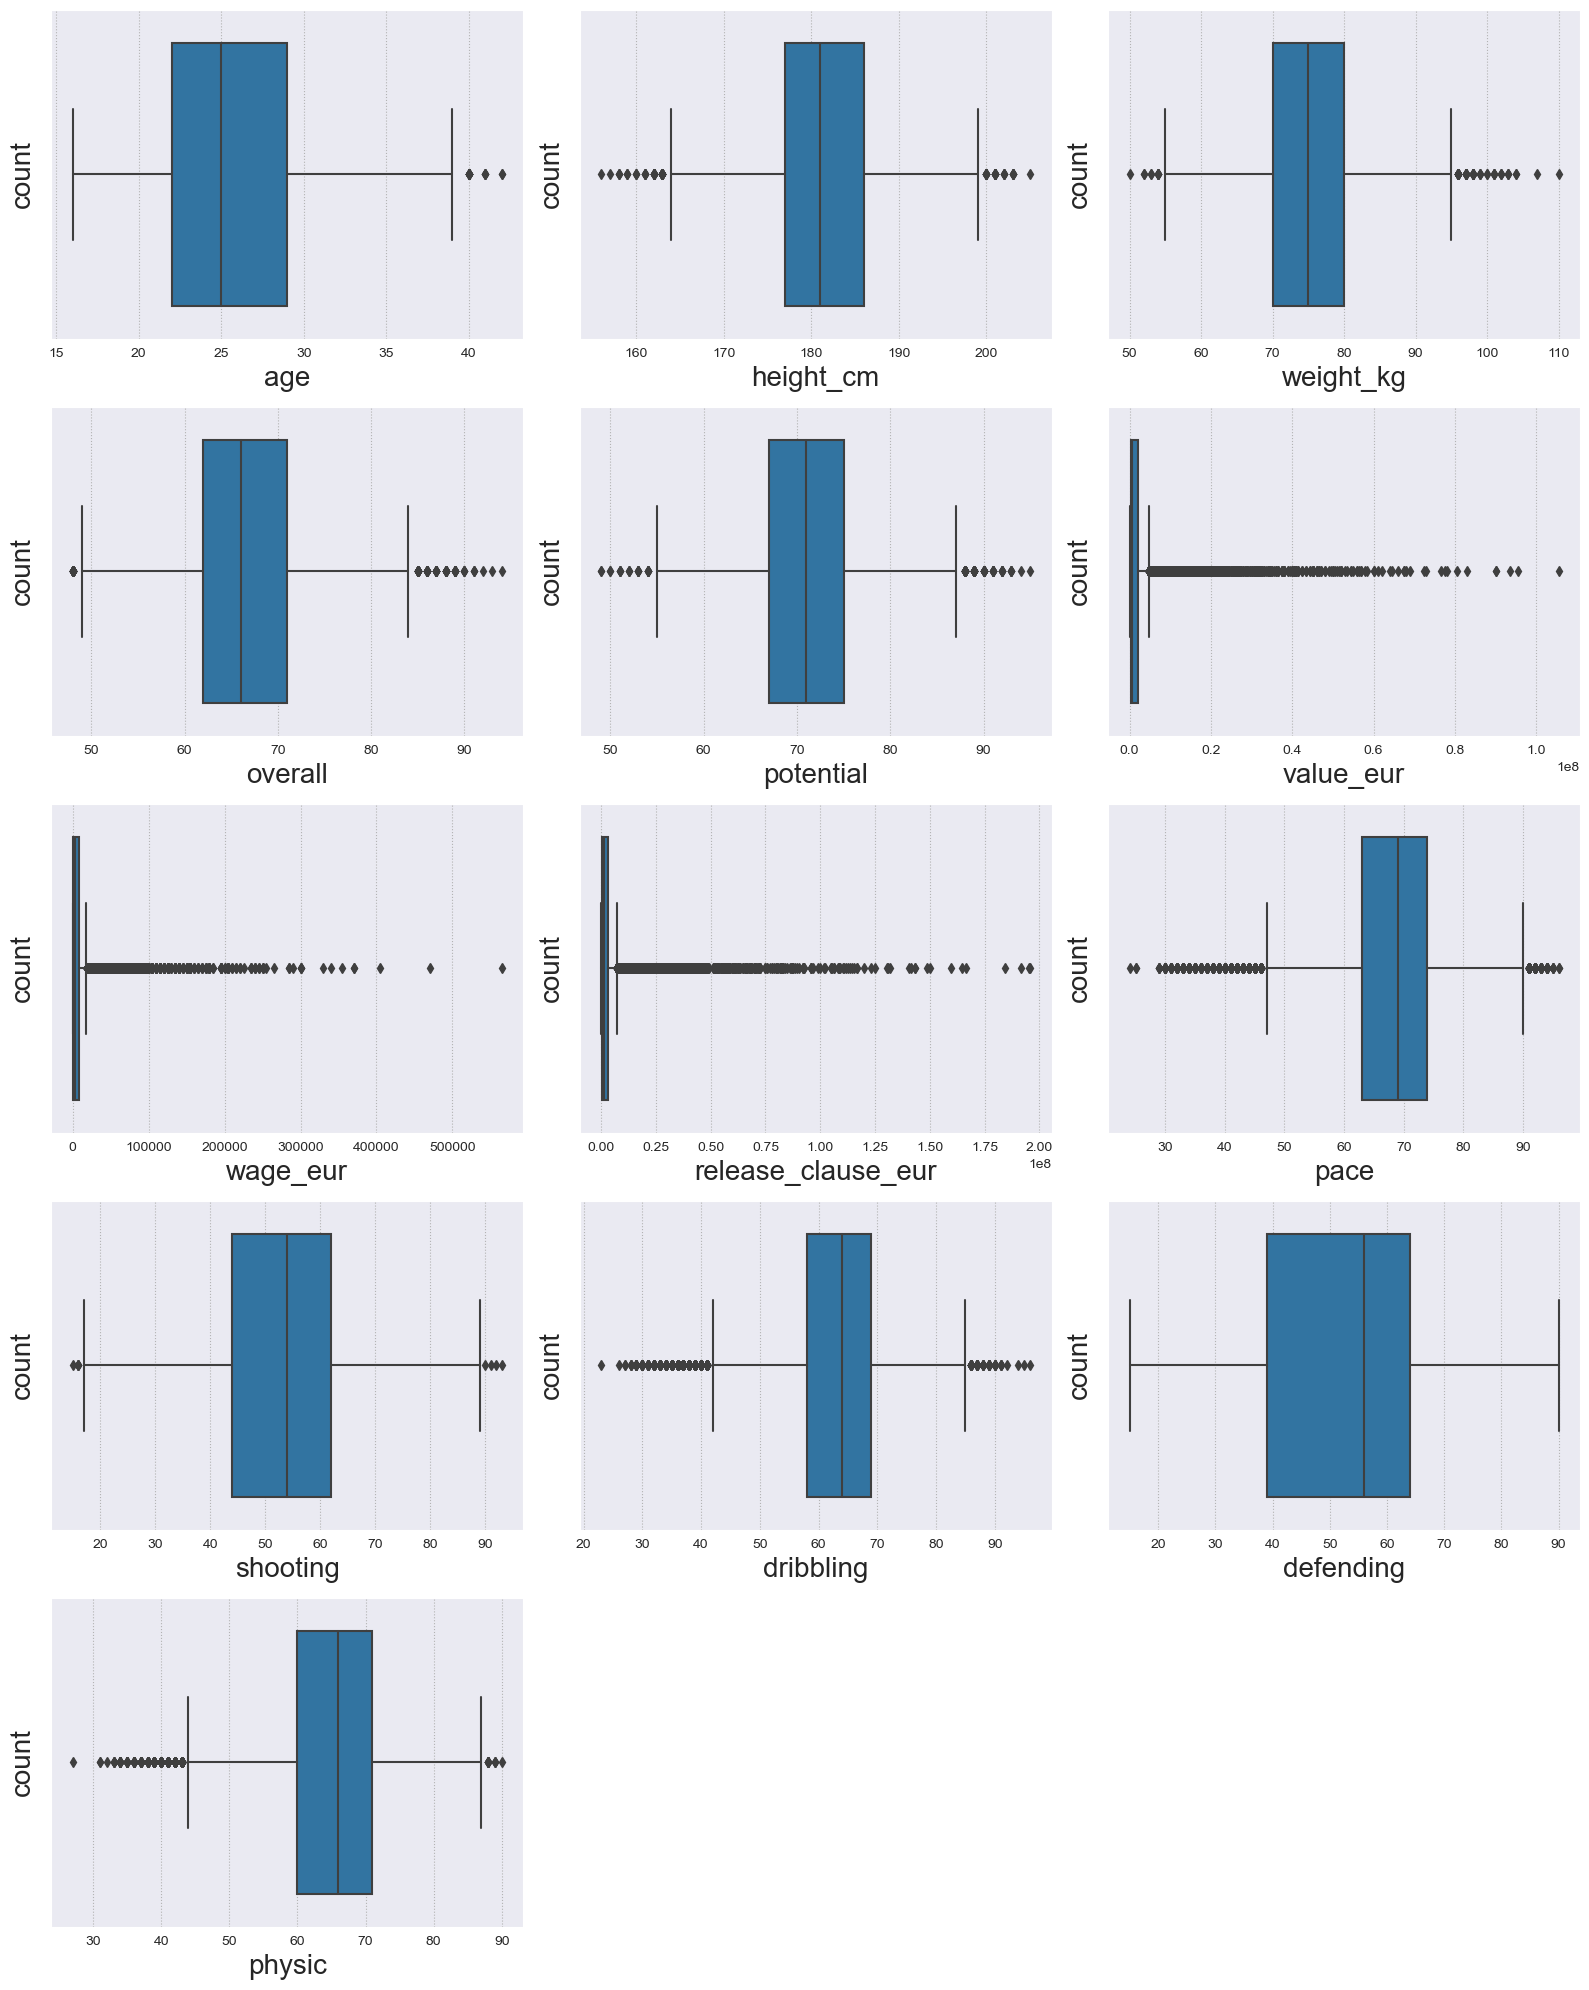

In [17]:
outlier_check = ['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur','pace',
           'shooting','dribbling','defending','physic']

plt.figure(figsize=(16,20),facecolor="white")
plotnumber=1

for column in outlier_check:
    if plotnumber<=len(num_data):
        plt.subplot(5,3,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel("count",fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### CHECKING THE DISTRIBUTION BEFORE HANDLE THE OUTLIER

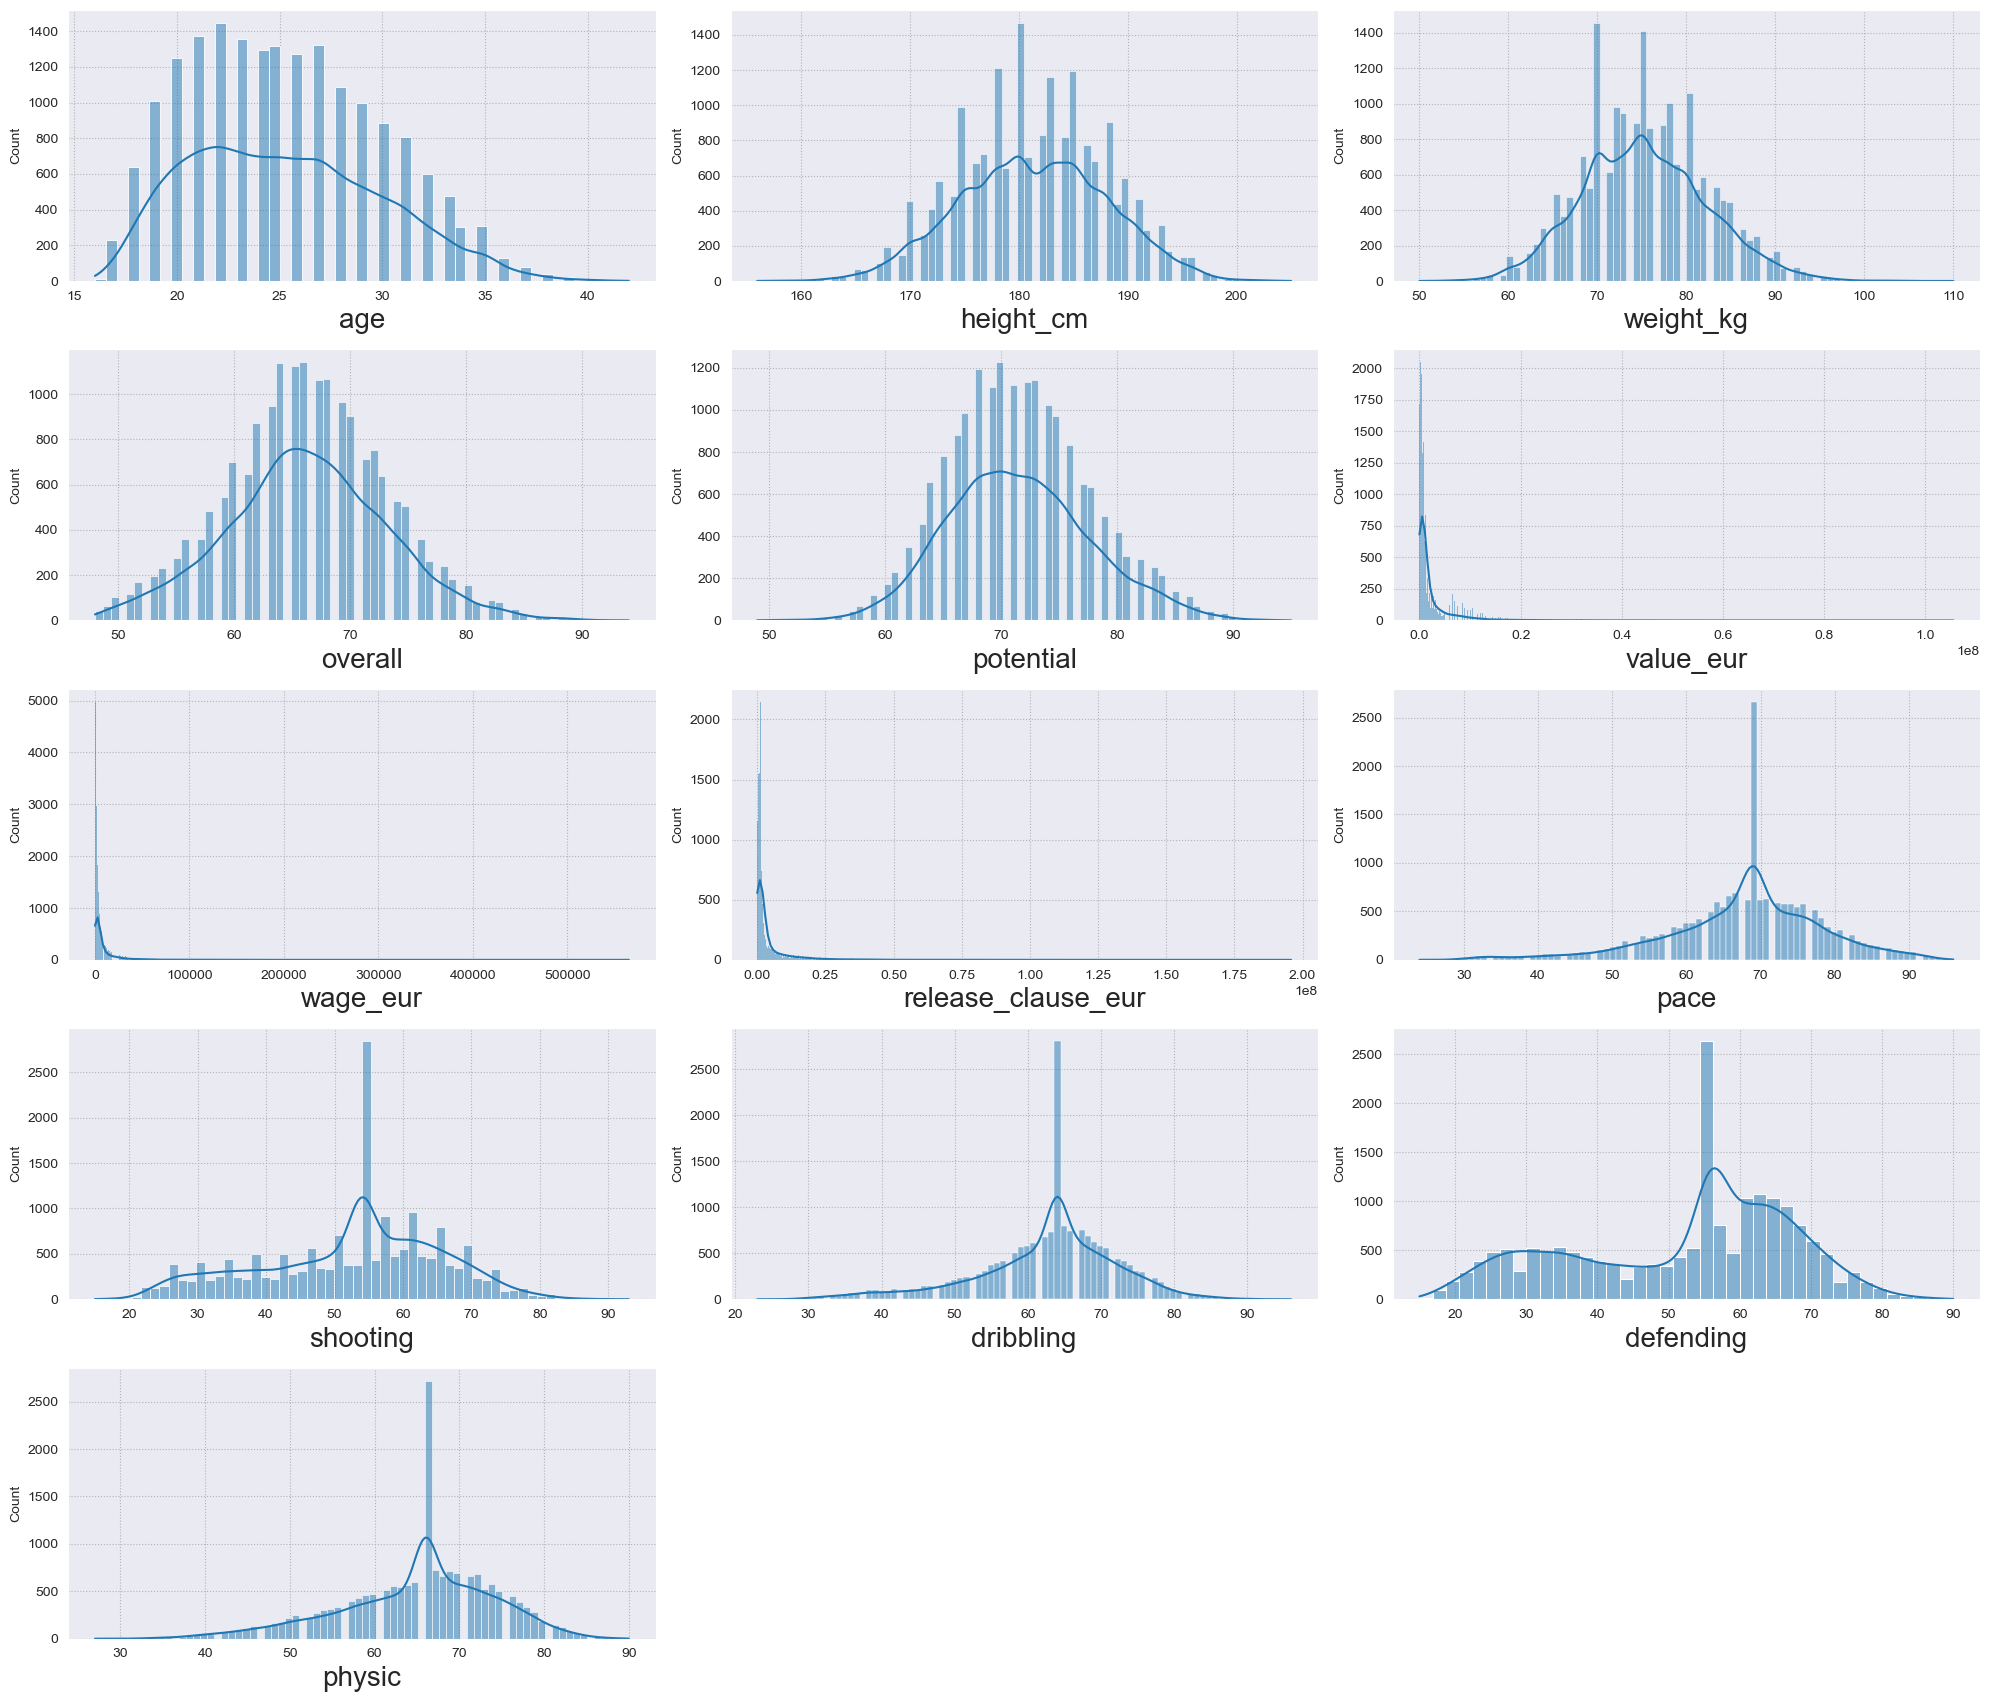

In [18]:
plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1

for column in outlier_check:
    if plotnumber<=len(num_data):
        plt.subplot(6,3,plotnumber)
        sns.histplot(x=data[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### 1. AGE

In [19]:
Q1=data["age"].quantile(0.25)
Q3=data["age"].quantile(0.75)

print("lower quartile",Q1)
print("upper quartile",Q3)

IQR=Q3-Q1
print(f"IQR is",IQR)

lower_limit=Q1-1.5*IQR
print("Lower limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("Upper limit is",upper_limit)

lower quartile 22.0
upper quartile 29.0
IQR is 7.0
Lower limit is 11.5
Upper limit is 39.5


In [20]:
data.loc[data["age"]>upper_limit]

sofifa_id                                         player_url  \
200         1179  https://sofifa.com/player/1179/gianluigi-buffo...   
868       153260  https://sofifa.com/player/153260/vitorino-hilt...   
1880       25420  https://sofifa.com/player/25420/claudio-pizarr...   
2963        7647  https://sofifa.com/player/7647/dario-dainelli/...   
2965      110638  https://sofifa.com/player/110638/alberto-cifue...   
3706      156483  https://sofifa.com/player/156483/cristian-lucc...   
4417       16097  https://sofifa.com/player/16097/nick-rimando/2...   
4418       16254  https://sofifa.com/player/16254/tim-howard/20/...   
6235      105308  https://sofifa.com/player/105308/jean-francois...   
7230      136553  https://sofifa.com/player/136553/dong-gook-lee...   
8359      142818  https://sofifa.com/player/142818/fabian-cubero...   
10665      49511  https://sofifa.com/player/49511/frode-kippe/20...   
10702     162952  https://sofifa.com/player/162952/mauricio-cara...   
11832     142998  https://sofifa.com/player/142998/cristian-muno...   
13003     208927  https://sofifa.com/player/208927/hussain-omar-...   
14527      53352  https://sofifa.com/player/53352/dannie-bulman/...   
15812     104900  https://sofifa.com/player/104900/michael-gursk...   
16314       2702  https://sofifa.com/player/2702/kevin-ellison/2...   
18233     182461  https://sofifa.com/player/182461/ting-zhou/20/...   

          short_name                           long_name  age         dob  \
200        G. Buffon                    Gianluigi Buffon   41  1978-01-28   
868           Hilton            Vitorino Hilton da Silva   41  1977-09-13   
1880      C. Pizarro       Claudio Miguel Pizarro Bossio   40  1978-10-03   
2963     D. Dainelli                      Dario Dainelli   40  1979-06-09   
2965       Cifuentes          Alberto Cifuentes Martínez   40  1979-05-29   
3706    C. Lucchetti            Cristian David Lucchetti   41  1978-06-26   
4417      N. Rimando                        Nick Rimando   40  1979-06-17   
4418       T. Howard                          Tim Howard   40  1979-03-06   
6235       J. Gillet                Jean-François Gillet   40  1979-05-31   
7230   Lee Dong Gook                             이동국 李东国   40  1979-04-29   
8359       F. Cubero               Fabián Alberto Cubero   40  1978-12-21   
10665       F. Kippe                         Frode Kippe   41  1978-01-17   
10702     M. Caranta              Mauricio Ariel Caranta   40  1978-07-31   
11832       C. Muñoz     Cristian Fernando Muñoz Hoffman   42  1977-07-01   
13003   H. Sulaimani  Hussein Omar Abdul Ghani Sulaimani   42  1977-01-21   
14527      D. Bulman                       Dannie Bulman   40  1979-01-24   
15812      M. Gurski                      Michael Gurski   40  1979-03-21   
16314     K. Ellison                       Kevin Ellison   40  1979-02-23   
18233      Zhou Ting                                  周挺   40  1979-02-05   

       height_cm  weight_kg     nationality                          club  \
200          192         92           Italy                      Juventus   
868          180         78          Brazil               Montpellier HSC   
1880         184         84            Peru              SV Werder Bremen   
2963         191         78           Italy                       Livorno   
2965         189         80           Spain                      Cádiz CF   
3706         182         69       Argentina              Atlético Tucumán   
4417         178         83   United States                Real Salt Lake   
4418         191         88   United States               Colorado Rapids   
6235         181         78         Belgium             Standard de Liège   
7230         185         80  Korea Republic        Jeonbuk Hyundai Motors   
8359         175         72       Argentina               Vélez Sarsfield   
10665        194         97          Norway                 Lillestrøm SK   
10702        184         77       Argentina 

In [21]:
len(data.loc[data["age"]>upper_limit])/len(data)

0.0010395010395010396

In [22]:
data.loc[data["age"]>upper_limit,"age"]=data["age"].median()

In [23]:
data.loc[data["age"]<lower_limit]

Empty DataFrame
Columns: [sofifa_id, player_url, short_name, long_name, age, dob, height_cm, weight_kg, nationality, club, overall, potential, value_eur, wage_eur, player_positions, preferred_foot, international_reputation, weak_foot, skill_moves, work_rate, body_type, real_face, release_clause_eur, player_tags, team_position, team_jersey_number, loaned_from, joined, contract_valid_until, nation_position, nation_jersey_number, pace, shooting, passing, dribbling, defending, physic, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, player_traits, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking, defending_standing_tackle, defending_sliding_tackle, goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes, ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, cdm, rdm, rwb, lb, ...]
Index: []

#### 2. HEIGHT_CM

In [24]:
# lower limit
lower_limit = data["height_cm"].mean()-3*data["height_cm"].std()
print("lower_limit",lower_limit)

# upper limit
upper_limit = data["height_cm"].mean()+3*data["height_cm"].std()
print("upper_limit",upper_limit)

lower_limit 161.09129995529332
upper_limit 201.6330681374958


In [25]:
data.loc[data["height_cm"]>upper_limit]

sofifa_id                                         player_url  \
3121      192613  https://sofifa.com/player/192613/costel-pantil...   
4868      224836  https://sofifa.com/player/224836/vanja-milinko...   
5451      199074  https://sofifa.com/player/199074/lacina-traore...   
7725      243675  https://sofifa.com/player/243675/kjell-scherpe...   
8200      225050  https://sofifa.com/player/225050/abdoul-ba/20/...   
9208      199321  https://sofifa.com/player/199321/tomas-holy/20...   
12808     215408  https://sofifa.com/player/215408/aaron-chapman...   
12864     237015  https://sofifa.com/player/237015/mikkel-mena-q...   
17149     243387  https://sofifa.com/player/243387/samuel-brolin...   
17365     241870  https://sofifa.com/player/241870/matt-casey/20...   
18034     237127  https://sofifa.com/player/237127/demba-thiam/2...   

                short_name               long_name  age         dob  \
3121         C. Pantilimon       Costel Pantilimon   32  1987-02-01   
4868   V. Milinković-Savić  Vanja Milinković-Savić   22  1997-02-20   
5451             L. Traoré           Lacina Traoré   29  1990-05-20   
7725           K. Scherpen          Kjell Scherpen   19  2000-01-23   
8200                 A. Ba               Abdoul Ba   25  1994-02-08   
9208               T. Holý              Tomáš Holý   27  1991-12-10   
12808           A. Chapman           Aaron Chapman   29  1990-05-29   
12864             M. Qvist       Mikkel Mena Qvist   26  1993-04-22   
17149            S. Brolin           Samuel Brolin   18  2000-09-29   
17365             M. Casey              Matt Casey   19  1999-11-13   
18034             D. Thiam             Demba Thiam   21  1998-03-09   

       height_cm  weight_kg     nationality                 club  overall  \
3121         203         96         Romania    Nottingham Forest       73   
4868         202         92          Serbia    Standard de Liège       70   
5451         203         87     Ivory Coast             CFR Cluj       70   
7725         202         85     Netherlands                 Ajax       67   
8200         203         94      Mauritania           AJ Auxerre       67   
9208         205        102  Czech Republic         Ipswich Town       66   
12808        203         92         England  Peterborough United       63   
12864        203         94         Denmark           AC Horsens       63   
17149        202         85          Sweden                  AIK       55   
17365        203         80         England           Portsmouth       54   
18034        202         87         Senegal                 SPAL       51   

       potential  value_eur  wage_eur player_positions  preferred_foot  \
3121          73    2400000     25000               GK               1   
4868          78    2000000      6000               GK               1   
5451          70    1800000      9000               ST               0   
7725          81    1400000      2000               GK               1   
8200          70     850000      2000               CB               0   
9208          70     575000      3000               GK               1   
12808         65     300000      2000               GK               1   
12864         64     375000      2000       CB, LM, ST               0   
17149         70     140000      1000               GK               1   
17365         74     140000      1000               CB               1   
18034         63      50000      1000               GK               1   

       international_reputation  weak_foot  skill_moves      work_rate  \
3121                          1          2            1  Medium/Medium   
4868                          1          3            1  Medium/Medium   
5451                          2          3            3     Medium/Low   
7725                          1          5            1  Medium/Medium   
8200                          1          2            2        Low/Low   
9208                          1          3 

In [26]:
len(data.loc[data["height_cm"]>upper_limit])/len(data)

0.0006018163912900755

In [27]:
data.loc[data["height_cm"]>upper_limit,"height_cm"] = data["height_cm"].mean()

In [28]:
data.loc[data["height_cm"]<lower_limit]

sofifa_id                                         player_url  \
1352      221634  https://sofifa.com/player/221634/luciano-acost...   
1496      183895  https://sofifa.com/player/183895/maxi-moralez/...   
1923      170719  https://sofifa.com/player/170719/diego-buonano...   
3159      199940  https://sofifa.com/player/199940/juan-ezequiel...   
3898      202184  https://sofifa.com/player/202184/joao-plata/20...   
3946      214327  https://sofifa.com/player/214327/vladimir-hern...   
4243      234698  https://sofifa.com/player/234698/chanathip-son...   
4552      190629  https://sofifa.com/player/190629/daniel-villal...   
4829      237994  https://sofifa.com/player/237994/nahuel-barrio...   
6541      222970  https://sofifa.com/player/222970/erhun-oztumer...   
6789      235714  https://sofifa.com/player/235714/misael-doming...   
7648      232789  https://sofifa.com/player/232789/teruhito-naka...   
12549     237091  https://sofifa.com/player/237091/hyeon-wook-ki...   
14812     241963  https://sofifa.com/player/241963/hamed-al-gham...   
15878     241046  https://sofifa.com/player/241046/jonas-romero/...   
16929     247822  https://sofifa.com/player/247822/josh-nisbet/2...   

           short_name                         long_name  age         dob  \
1352        L. Acosta           Luciano Federico Acosta   25  1994-05-31   
1496       M. Moralez         Maximiliano Nicol Moralez   32  1987-02-27   
1923    D. Buonanotte      Diego Mario Buonanotte Rende   31  1988-04-19   
3159        J. Cuevas              Juan Ezequiel Cuevas   31  1988-06-04   
3898         J. Plata           João Jimmy Plata Cotera   27  1992-03-01   
3946     V. Hernández  Vladimir Javier Hernández Rivero   30  1989-04-23   
4243    C. Songkrasin              Chanathip Songkrasin   25  1993-10-05   
4552      D. Villalva   Daniel Alberto Villalba Barrios   26  1992-07-06   
4829       N. Barrios           Cristian Nahuel Barrios   21  1998-05-07   
6541       E. Oztumer                     Erhun Oztumer   28  1991-05-29   
6789     M. Domínguez   Josué Misael Domínguez González   19  1999-10-27   
7648      T. Nakagawa                             仲川 輝人   26  1992-07-27   
12549  Kim Hyeon Wook                           김현욱 金贤旭   24  1995-06-22   
14812    H. Al Ghamdi                   Hamed Al Ghamdi   20  1999-04-02   
15878       J. Romero                      Jonás Romero   18  2000-08-21   
16929       J. Nisbet                       Josh Nisbet   20  1999-06-15   

       height_cm  weight_kg     nationality                         club  \
1352       161.0         61       Argentina                    DC United   
1496       158.0         56       Argentina             New York City FC   
1923       161.0         57       Argentina         Universidad Católica   
3159       161.0         63       Argentina   CD Everton de Viña del Mar   
3898       157.0         71         Ecuador               Real Salt Lake   
3946       160.0         61        Colombia            Atlético Nacional   
4243       158.0         56        Thailand   Hokkaido Consadole Sapporo   
4552       159.0         62       Argentina  Tiburones Rojos de Veracruz   
4829       156.0         58       Argentina       San Lorenzo de Almagro   
6541       160.0         60         England            Charlton Athletic   
6789       159.0         58          Mexico                    Cruz Azul   
7648       161.0         57           Japan          Yokohama F. Marinos   
12549      160.0         61  Korea Republic                   Gangwon FC   
14812      161.0         59    Saudi Arabia                   Ettifaq FC   
15878      159.0         59       Argentina             Atlético Tucumán   
16929      158.0         58       Australia       Central Coast Mariners   

       overall  potential  value_eur  wage_eur player_positions  \
1352        76         80   10000000      9000          CAM, LM   
1496        76         76    6000000      9000          CAM, CM   
1923        

In [29]:
len(data.loc[data["height_cm"]<lower_limit])/len(data)

0.000875369296421928

In [30]:
data.loc[data["height_cm"]<lower_limit,"height_cm"] = data["height_cm"].mean()

#### 3. WEIGHT_KG

In [31]:
# lower_limit
lower_limit=data["weight_kg"].mean()-3*data["weight_kg"].std()
print("lower_limit",lower_limit)

# upper_limit
upper_limit=data["weight_kg"].mean()+3*data["weight_kg"].std()
print("upper_limit",upper_limit)

lower_limit 54.13311243369853
upper_limit 96.41957385582987


In [32]:
data.loc[data["weight_kg"]>upper_limit]

sofifa_id                                         player_url  \
77        212190  https://sofifa.com/player/212190/niklas-sule/2...   
165       213331  https://sofifa.com/player/213331/jonathan-tah/...   
280       203263  https://sofifa.com/player/203263/harry-maguire...   
518       179783  https://sofifa.com/player/179783/ralf-fahrmann...   
642       202750  https://sofifa.com/player/202750/willy-boly/20...   
851       202849  https://sofifa.com/player/202849/jannik-vester...   
1147      164376  https://sofifa.com/player/164376/graziano-pell...   
1217      200212  https://sofifa.com/player/200212/michael-esser...   
1389      199833  https://sofifa.com/player/199833/lars-unnersta...   
1834      220932  https://sofifa.com/player/220932/lovre-kalinic...   
1888      136113  https://sofifa.com/player/136113/wes-morgan/20...   
2278      194904  https://sofifa.com/player/194904/bill-hamid/20...   
2947      216793  https://sofifa.com/player/216793/jean-david-be...   
3030      177578  https://sofifa.com/player/177578/sebastian-pro...   
3623      190780  https://sofifa.com/player/190780/sean-johnson/...   
5070      244793  https://sofifa.com/player/244793/tomas-chory/2...   
5266      163600  https://sofifa.com/player/163600/john-ruddy/20...   
6067      222889  https://sofifa.com/player/222889/lucas-acevedo...   
6853      213545  https://sofifa.com/player/213545/jeppe-hojbjer...   
7439      195357  https://sofifa.com/player/195357/fabien-farnol...   
7957      230561  https://sofifa.com/player/230561/jay-roy-grot/...   
9006      235925  https://sofifa.com/player/235925/gaston-gomez/...   
9151      210347  https://sofifa.com/player/210347/ivan-lucic/20...   
9208      199321  https://sofifa.com/player/199321/tomas-holy/20...   
9309      213646  https://sofifa.com/player/213646/miguel-aires-...   
9572      179685  https://sofifa.com/player/179685/chris-seitz/2...   
10138     243713  https://sofifa.com/player/243713/issa-marega/2...   
10591     251019  https://sofifa.com/player/251019/tomas-petrase...   
10611     201873  https://sofifa.com/player/201873/joe-bendik/20...   
10665      49511  https://sofifa.com/player/49511/frode-kippe/20...   
10693     156321  https://sofifa.com/player/156321/adebayo-akinf...   
11561     190822  https://sofifa.com/player/190822/eirik-holmen-...   
11684     202904  https://sofifa.com/player/202904/joonas-tamm/2...   
11945     190169  https://sofifa.com/player/190169/dennis-telgen...   
13201     241388  https://sofifa.com/player/241388/dennis-smarsc...   
13576     239746  https://sofifa.com/player/239746/lukas-watkowi...   
14546     182076  https://sofifa.com/player/182076/zhenli-liu/20...   
15064     237399  https://sofifa.com/player/237399/evan-louro/20...   
16695     175603  https://sofifa.com/player/175603/rene-gilmarti...   
17158     247620  https://sofifa.com/player/247620/phillip-ejima...   
17444     240297  https://sofifa.com/player/240297/robin-kallman...   

            short_name                       long_name  age         dob  \
77             N. Süle                     Niklas Süle   23  1995-09-03   
165             J. Tah                    Jonathan Tah   23  1996-02-11   
280         H. Maguire                   Harry Maguire   26  1993-03-05   
518        R. Fährmann                   Ralf Fährmann   30  1988-09-27   
642            W. Boly                      Willy Boly   28  1991-02-03   
851     J. Vestergaard              Jannik Vestergaard   26  1992-08-03   
1147          G. Pellè                  Graziano Pellè   33  1985-07-15   
1217          M. Esser                   Michael Esser   31  1987-11-22   
1389     L. Unnerstall                 Lars Unnerstall   28  1990-07-20   
1834        L. Kalinić                   Lovre Kalinić   29  1990-04-03   
1888         W. Morgan                      Wes Morgan   35  1984-01-21   
2278          B. Hamid                      Bill Hamid   28  1990-11-25   
2947       J. Beauguel             Jean-David Bea

In [33]:
len(data.loc[data["weight_kg"]>upper_limit])/len(data)

0.0022431338220811905

In [34]:
data.loc[data["weight_kg"]>upper_limit,"weight_kg"]=data["weight_kg"].mean()

In [35]:
data.loc[data["weight_kg"]<lower_limit]

sofifa_id                                         player_url  \
4982      214919  https://sofifa.com/player/214919/diego-rojas/2...   
5680      225964  https://sofifa.com/player/225964/jorge-carrasc...   
10114     234430  https://sofifa.com/player/234430/isidro-ros-ri...   
10455     239505  https://sofifa.com/player/239505/patryk-kun/20...   
12666     232682  https://sofifa.com/player/232682/abdulmajeed-a...   
13070     235600  https://sofifa.com/player/235600/bandar-al-mut...   
13254     235121  https://sofifa.com/player/235121/bryan-lozano/...   
17022     252422  https://sofifa.com/player/252422/mohsen-abdull...   
17078     246091  https://sofifa.com/player/246091/jorge-garcia/...   
17612     245496  https://sofifa.com/player/245496/muhannad-al-s...   
17817     248551  https://sofifa.com/player/248551/tomas-stabell...   

           short_name                      long_name  age         dob  \
4982         D. Rojas   Diego Nicolás Rojas Orellana   24  1995-02-15   
5680     J. Carrascal                Jorge Carrascal   21  1998-05-25   
10114         Isi Ros                Isidro Ros Ríos   23  1995-11-06   
10455          P. Kun                     Patryk Kun   24  1995-04-20   
12666     A. Al Suwat   Abdulmajeed Abdullah Al-Swat   24  1995-04-21   
13070   B. Al Mutairi              Bandar Al Mutairi   29  1990-03-14   
13254       B. Lozano  Brian Avelino Lozano Aparicio   22  1997-03-20   
17022     M. Abdullah                Mohsen Abdullah   24  1995-04-13   
17078       J. García                   Jorge García   17  2002-01-22   
17612  M. Al Shudukhi           Muhannad Al Shudukhi   20  1999-04-15   
17817      T. Stabell                  Tomas Stabell   17  2002-01-30   

       height_cm  weight_kg           nationality               club  overall  \
4982       164.0       52.0                 Chile    Unión La Calera       70   
5680       178.0       54.0              Colombia        River Plate       69   
10114      165.0       53.0                 Spain        AD Alcorcón       65   
10455      165.0       54.0                Poland  Raków Częstochowa       65   
12666      168.0       54.0          Saudi Arabia         Al Taawoun       63   
13070      168.0       50.0          Saudi Arabia           Al Fayha       63   
13254      167.0       54.0                Mexico           U.N.A.M.       62   
17022      164.0       52.0  United Arab Emirates          Al Ain FC       56   
17078      165.0       53.0                Mexico          Cruz Azul       55   
17612      170.0       54.0          Saudi Arabia            Al Raed       53   
17817      167.0       54.0                Norway          Tromsø IL       52   

       potential  value_eur  wage_eur player_positions  preferred_foot  \
4982          75    2400000      2000              CAM               0   
5680          82    2000000      8000              CAM               1   
10114         74     825000      3000       LM, ST, RM               0   
10455         69     700000      1000               LM               1   
12666         68     500000      4000      CAM, RM, CM               1   
13070         63     300000      4000              LWB               0   
13254         74     550000      4000           RW, RM               0   
17022         62     120000      1000           CM, RM               1   
17078         79     160000      1000               CB               1   
17612         71     130000      2000               RM               1   
17817         70     100000      1000               CM               1   

       international_reputation  weak_foot  skill_moves      work_rate  \
4982                          1          4            3  Medium/Medium   
5680                          1          2            4  Medium/Medium   
10114                         1          4            4  Medium/Medium   
10455                         1          3            3    High/Medium   
12666                         1          3   

In [36]:
len(data.loc[data["weight_kg"]<lower_limit])/len(data)

0.0006018163912900755

In [37]:
data.loc[data["weight_kg"]<lower_limit,"weight_kg"] = data["weight_kg"].mean()

#### 4. OVERALL

In [38]:
# Lower_limit
lower_limit=data["overall"].mean()-3*data["overall"].std()
print("lower_limit",lower_limit)

# upper_limit
upper_limit=data["overall"].mean()+3*data["overall"].std()
print("upper_limit",upper_limit)

lower_limit 45.395134216946126
upper_limit 87.09485374672605


In [39]:
data.loc[data["overall"]>upper_limit]

sofifa_id                                         player_url  \
0      158023  https://sofifa.com/player/158023/lionel-messi/...   
1       20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2      190871  https://sofifa.com/player/190871/neymar-da-sil...   
3      200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4      183277  https://sofifa.com/player/183277/eden-hazard/2...   
5      192985  https://sofifa.com/player/192985/kevin-de-bruy...   
6      192448  https://sofifa.com/player/192448/marc-andre-te...   
7      203376  https://sofifa.com/player/203376/virgil-van-di...   
8      177003  https://sofifa.com/player/177003/luka-modric/2...   
9      209331  https://sofifa.com/player/209331/mohamed-salah...   
10     231747  https://sofifa.com/player/231747/kylian-mbappe...   
11     201024  https://sofifa.com/player/201024/kalidou-kouli...   
12     202126  https://sofifa.com/player/202126/harry-kane/20...   
13     212831  https://sofifa.com/player/212831/alisson-ramse...   
14     193080  https://sofifa.com/player/193080/david-de-gea-...   
15     215914  https://sofifa.com/player/215914/ngolo-kante/2...   
16     138956  https://sofifa.com/player/138956/giorgio-chiel...   
17     153079  https://sofifa.com/player/153079/sergio-aguero...   
18     155862  https://sofifa.com/player/155862/sergio-ramos-...   
19     176580  https://sofifa.com/player/176580/luis-suarez/2...   
20     188545  https://sofifa.com/player/188545/robert-lewand...   
21     189511  https://sofifa.com/player/189511/sergio-busque...   
22     194765  https://sofifa.com/player/194765/antoine-griez...   
23     211110  https://sofifa.com/player/211110/paulo-dybala/...   
24     195864  https://sofifa.com/player/195864/paul-pogba/20...   
25     210257  https://sofifa.com/player/210257/ederson-santa...   
26     202652  https://sofifa.com/player/202652/raheem-sterli...   
27     190460  https://sofifa.com/player/190460/christian-eri...   
28     192119  https://sofifa.com/player/192119/thibaut-court...   
29     152729  https://sofifa.com/player/152729/gerard-pique-...   
30     162835  https://sofifa.com/player/162835/samir-handano...   
31     167495  https://sofifa.com/player/167495/manuel-neuer/...   
32     167948  https://sofifa.com/player/167948/hugo-lloris/2...   
33     168542  https://sofifa.com/player/168542/david-josue-j...   
34     179813  https://sofifa.com/player/179813/edinson-cavan...   
35     182493  https://sofifa.com/player/182493/diego-godin/2...   
36     182521  https://sofifa.com/player/182521/toni-kroos/20...   
37     188350  https://sofifa.com/player/188350/marco-reus/20...   
38     188567  https://sofifa.com/player/188567/pierre-emeric...   
39     208722  https://sofifa.com/player/208722/sadio-mane/20...   

           short_name                            long_name  age         dob  \
0            L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1   Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2           Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3            J. Oblak                            Jan Oblak   26  1993-01-07   
4           E. Hazard                          Eden Hazard   28  1991-01-07   
5        K. De Bruyne                      Kevin De Bruyne   28  1991-06-28   
6       M. ter Stegen                Marc-André ter Stegen   27  1992-04-30   
7         V. van Dijk                      Virgil van Dijk   27  1991-07-08   
8           L. Modrić                          Luka Modrić   33  1985-09-09   
9            M. Salah                 Mohamed  Salah Ghaly   27  1992-06-15   
10          K. Mbappé                        Kylian Mbappé   20  1998-12-20   
11       K. Koulibaly                    Kalidou Koulibaly   28  1991-06-20   
12            H. Kane                           Harry Kane   25  1993-07-28   
13            Alisson                Alisson Ramses Becker   26  1992-10-02   
14             De Gea         

In [40]:
len(data.loc[data["overall"]>upper_limit])/len(data)

0.00218842324105482

In [41]:
data.loc[data["overall"]>upper_limit,"overall"]=data["overall"].mean()

In [42]:
data.loc[data["overall"]<lower_limit]

Empty DataFrame
Columns: [sofifa_id, player_url, short_name, long_name, age, dob, height_cm, weight_kg, nationality, club, overall, potential, value_eur, wage_eur, player_positions, preferred_foot, international_reputation, weak_foot, skill_moves, work_rate, body_type, real_face, release_clause_eur, player_tags, team_position, team_jersey_number, loaned_from, joined, contract_valid_until, nation_position, nation_jersey_number, pace, shooting, passing, dribbling, defending, physic, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, player_traits, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking, defending_standing_tackle, defending_sliding_tackle, goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes, ls, st, rs, lw, lf, cf, rf, rw, lam, cam, ram, lm, lcm, cm, rcm, rm, lwb, ldm, cdm, rdm, rwb, lb, ...]
Index: []

#### 5. POTENTIAL

In [43]:
# lower_limit
lower_limit = data["potential"].mean()-3*data["potential"].std()
print("lower_limit",lower_limit)

# upper_limit
upper_limit = data["potential"].mean()+3*data["potential"].std()
print("upper_limit",upper_limit)

lower_limit 53.12787974307086
upper_limit 89.96589419280835


In [44]:
data.loc[data["potential"]>upper_limit]

sofifa_id                                         player_url  \
0        158023  https://sofifa.com/player/158023/lionel-messi/...   
1         20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2        190871  https://sofifa.com/player/190871/neymar-da-sil...   
3        200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4        183277  https://sofifa.com/player/183277/eden-hazard/2...   
5        192985  https://sofifa.com/player/192985/kevin-de-bruy...   
6        192448  https://sofifa.com/player/192448/marc-andre-te...   
7        203376  https://sofifa.com/player/203376/virgil-van-di...   
8        177003  https://sofifa.com/player/177003/luka-modric/2...   
9        209331  https://sofifa.com/player/209331/mohamed-salah...   
10       231747  https://sofifa.com/player/231747/kylian-mbappe...   
11       201024  https://sofifa.com/player/201024/kalidou-kouli...   
12       202126  https://sofifa.com/player/202126/harry-kane/20...   
13       212831  https://sofifa.com/player/212831/alisson-ramse...   
14       193080  https://sofifa.com/player/193080/david-de-gea-...   
15       215914  https://sofifa.com/player/215914/ngolo-kante/2...   
23       211110  https://sofifa.com/player/211110/paulo-dybala/...   
24       195864  https://sofifa.com/player/195864/paul-pogba/20...   
25       210257  https://sofifa.com/player/210257/ederson-santa...   
26       202652  https://sofifa.com/player/202652/raheem-sterli...   
40       212218  https://sofifa.com/player/212218/aymeric-lapor...   
41       218667  https://sofifa.com/player/218667/bernardo-mota...   
55       222492  https://sofifa.com/player/222492/leroy-sane/20...   
56       207865  https://sofifa.com/player/207865/marcos-aoas-c...   
57       232363  https://sofifa.com/player/232363/milan-skrinia...   
73       235243  https://sofifa.com/player/235243/matthijs-de-l...   
74       230621  https://sofifa.com/player/230621/gianluigi-don...   
75       228702  https://sofifa.com/player/228702/frenkie-de-jo...   
76       201535  https://sofifa.com/player/201535/raphael-varan...   
77       212190  https://sofifa.com/player/212190/niklas-sule/2...   
78       223848  https://sofifa.com/player/223848/sergej-milink...   
79       231866  https://sofifa.com/player/231866/rodrigo-herna...   
108      233049  https://sofifa.com/player/233049/jadon-sancho/...   
109      235790  https://sofifa.com/player/235790/kai-havertz/2...   
110      231443  https://sofifa.com/player/231443/ousmane-dembe...   
157      226271  https://sofifa.com/player/226271/fabian-ruiz-p...   
411      242444  https://sofifa.com/player/242444/joao-felix-se...   
568      238794  https://sofifa.com/player/238794/vinicius-jose...   
1254     237692  https://sofifa.com/player/237692/phil-foden/20...   

               short_name                                long_name  age  \
0                L. Messi           Lionel Andrés Messi Cuccittini   32   
1       Cristiano Ronaldo      Cristiano Ronaldo dos Santos Aveiro   34   
2               Neymar Jr            Neymar da Silva Santos Junior   27   
3                J. Oblak                                Jan Oblak   26   
4               E. Hazard                              Eden Hazard   28   
5            K. De Bruyne                          Kevin De Bruyne   28   
6           M. ter Stegen                    Marc-André ter Stegen   27   
7             V. van Dijk                          Virgil van Dijk   27   
8               L. Modrić                              Luka Modrić   33   
9                M. Salah                     Mohamed  Salah Ghaly   27   
10              K. Mbappé                            Kylian Mbappé   20   
11           K. Koulibaly                        Kalidou Koulibaly   28   
12                H. Kane                               Harry Kane   25   
13                Alisson                    Alisson Ramses Becker   26   
14                 De Gea                    David De Gea Quintana   28   
15   

In [45]:
len(data.loc[data["potential"]>upper_limit])/len(data)

0.0021337126600284497

In [46]:
data.loc[data["potential"]>upper_limit,"potential"]=data["potential"].mean()

In [47]:
data.loc[data["potential"]<lower_limit]

sofifa_id                                         player_url  \
17777     224650  https://sofifa.com/player/224650/kai-sun/20/15...   
17778     224695  https://sofifa.com/player/224695/zhen-ge/20/15...   
17779     240430  https://sofifa.com/player/240430/gaston-poncet...   
17945     233717  https://sofifa.com/player/233717/bo-jin/20/159586   
17946      11430  https://sofifa.com/player/11430/jamie-mccombe/...   
17947     182478  https://sofifa.com/player/182478/xuanhong-wang...   
17948     245558  https://sofifa.com/player/245558/gary-maley/20...   
18064     241303  https://sofifa.com/player/241303/gong-zhang/20...   
18065     252855  https://sofifa.com/player/252855/wayne-horliso...   
18165     243073  https://sofifa.com/player/243073/shangkun-teng...   
18166     243110  https://sofifa.com/player/243110/qibin-sun/20/...   
18167     248852  https://sofifa.com/player/248852/ziya-alkurt/2...   
18168     252355  https://sofifa.com/player/252355/rodrigo-herna...   
18232     243117  https://sofifa.com/player/243117/weijun-xie/20...   
18233     182461  https://sofifa.com/player/182461/ting-zhou/20/...   
18234     247775  https://sofifa.com/player/247775/junzhe-zhang/...   
18277     233449  https://sofifa.com/player/233449/ximing-pan/20...   

          short_name          long_name  age         dob  height_cm  \
17777        Sun Kai                 孙凯   28  1991-03-26      178.0   
17778        Ge Zhen            Zhen Ge   32  1987-06-23      179.0   
17779      G. Poncet      Gastón Poncet   27  1991-07-31      187.0   
17945         Jin Bo                 金波   26  1993-01-20      176.0   
17946     J. McCombe     Jamie  McCombe   36  1983-01-01      196.0   
17947  Wang Xuanhong                王选宏   29  1989-07-24      181.0   
17948       G. Maley         Gary Maley   36  1982-08-03      188.0   
18064     Zhang Gong                 张功   27  1992-04-10      177.0   
18065    W. Horlison     Wayne Horlison   27  1992-02-29      180.0   
18165  Teng Shangkun                滕尚坤   28  1991-01-10      186.0   
18166      Sun Qibin                孙启斌   27  1991-11-06      192.0   
18167      Z. Alkurt        Ziya Alkurt   28  1990-09-26      176.0   
18168   R. Hernández  Rodrigo Hernández   30  1989-02-23      173.0   
18232     Xie Weijun                谢维军   21  1997-11-14      190.0   
18233      Zhou Ting                 周挺   25  1979-02-05      182.0   
18234   Zhang Junzhe                张俊哲   28  1991-02-20      183.0   
18277     Pan Ximing                潘喜明   26  1993-01-11      182.0   

       weight_kg nationality                           club  overall  \
17777       72.0    China PR  Shanghai Greenland Shenhua FC     53.0   
17778       72.0    China PR                    Shenzhen FC     53.0   
17779       83.0     Uruguay                     La Equidad     53.0   
17945       70.0    China PR               Guangzhou R&F FC     52.0   
17946       79.0     England                   Lincoln City     52.0   
17947       81.0    China PR               Beijing Renhe FC     52.0   
17948       90.0    Scotland                  Livingston FC     52.0   
18064       74.0    China PR               Guangzhou R&F FC     51.0   
18065       75.0     England                           Bury     51.0   
18165       78.0    China PR                Tianjin TEDA FC     50.0   
18166       80.0    China PR            Tianjin Quanjian FC     50.0   
18167       74.0      Turkey                    Kayserispor     50.0   
18168       71.0      Mexico    Tiburones Rojos de Veracruz     50.0   
18232       77.0    China PR                Tianjin TEDA FC     49.0   
18233       73.0    China PR               Dalian YiFang FC     49.0   
18234       69.0    China PR         Hebei China Fortune FC     49.0   
18277       78.0    China PR         Hebei China Fortune FC     48.0   

       potential  value_eur  wage_eur player_positions  preferred_foot  \
17777       53.0      50000      2000               LB               0   
1777

In [48]:
len(data.loc[data["potential"]<lower_limit])/len(data)

0.0009300798774482985

In [49]:
data.loc[data["potential"]<lower_limit,"potential"] = data["potential"].mean()

#### 6. VALUE_EUR

In [50]:
Q1 = data["value_eur"].quantile(0.25)
Q3 = data["value_eur"].quantile(0.75)

print("lower_quantile",Q1)
print("upper_quantile",Q3)

IQR = Q3-Q1
print(f"IQR is",IQR)

lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR

print("lower_limit",lower_limit)
print("upper_limit",upper_limit)

lower_quantile 325000.0
upper_quantile 2100000.0
IQR is 1775000.0
lower_limit -2337500.0
upper_limit 4762500.0


In [56]:
data.loc[data["value_eur"]>upper_limit,"value_eur"]=data["value_eur"].median()

#### 7. WAGE_EUR

In [57]:
Q1=data["wage_eur"].quantile(0.25)
Q3=data["wage_eur"].quantile(0.75)

print("lower_quantile",Q1)
print("upper_quantile",Q3)

IQR = Q3-Q1
print(f"IQR is",IQR)

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

print("lower_limit",lower_limit)
print("upper_limit",upper_limit)

lower_quantile 1000.0
upper_quantile 8000.0
IQR is 7000.0
lower_limit -9500.0
upper_limit 18500.0


In [58]:
data.loc[data["wage_eur"]>upper_limit,"wage_eur"]=data["wage_eur"].median()

#### 8. RELEASE_CLAUSE_EUR

In [59]:
Q1 = data["release_clause_eur"].quantile(0.25)
Q3 = data["release_clause_eur"].quantile(0.75)

print("lower_quantile",Q1)
print("upper_quantile",Q3)

IQR = Q3 - Q1
print(f"IQR is",IQR)

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

print("lower_limit",lower_limit)
print("upper_limit",upper_limit)

lower_quantile 596000.0
upper_quantile 3200000.0
IQR is 2604000.0
lower_limit -3310000.0
upper_limit 7106000.0


In [60]:
data.loc[data["release_clause_eur"]>upper_limit,"release_clause_eur"]=data["release_clause_eur"].median()

#### 9. PACE

In [61]:
Q1 = data["pace"].quantile(0.25)
Q3 = data["pace"].quantile(0.75)

print("lower_quantile",Q1)
print("upper_quantile",Q3)

IQR = Q3 - Q1
print(f"IQR is",IQR)

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

print("lower_limit",lower_limit)
print("upper_limit",upper_limit)

lower_quantile 63.0
upper_quantile 74.0
IQR is 11.0
lower_limit 46.5
upper_limit 90.5


In [62]:
data.loc[data["pace"]>upper_limit,"pace"]=data["pace"].median()

In [63]:
data.loc[data["pace"]<lower_limit,"pace"]=data["pace"].median()

#### 10. SHOOTING

In [64]:
Q1 = data["shooting"].quantile(0.25)
Q3 = data["shooting"].quantile(0.75)

print("lower_quantile",Q1)
print("upper_quantile",Q3)

IQR = Q3-Q1
print(f"IQR is",IQR)

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print("lower_limit",lower_limit)
print("upper_limit",upper_limit)

lower_quantile 44.0
upper_quantile 62.0
IQR is 18.0
lower_limit 17.0
upper_limit 89.0


In [65]:
data.loc[data["shooting"]>upper_limit,"shooting"]=data["shooting"].median()

In [66]:
data.loc[data["shooting"]<lower_limit,"shooting"]=data["shooting"].median()

#### 11.DRIBBING

In [67]:
# lower limit
lower_limit=data["dribbling"].mean()-3*data["dribbling"].std()
print("lower_limit",lower_limit)

# upper_limit
upper_limit=data["dribbling"].mean()+3*data["dribbling"].std()
print("upper_limit",upper_limit)

lower_limit 33.576591534301954
upper_limit 91.81371375074018


In [68]:
data.loc[data["dribbling"]>upper_limit,"dribbling"]=data["dribbling"].mean()
data.loc[data["dribbling"]<lower_limit,"dribbling"]=data["dribbling"].mean()

#### 12. PHYSIC

In [69]:
Q1 = data["physic"].quantile(0.25)
Q3 = data["physic"].quantile(0.75)

print("lower_quantile",Q1)
print("upper_quantile",Q3)

IQR = Q3-Q1
print(f"IQR is",IQR)

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print("lower_limit",lower_limit)
print("upper_limit",upper_limit)

lower_quantile 60.0
upper_quantile 71.0
IQR is 11.0
lower_limit 43.5
upper_limit 87.5


In [70]:
data.loc[data["physic"]>upper_limit,"physic"]=data["physic"].median()
data.loc[data["physic"]<lower_limit,"physic"]=data["physic"].median()

### 4. SCALING
### MIN-MAX SCALING
- Use min max scaling because of dataset contain large amount of outlier so outlier is going to be biased.

In [71]:
 # Scale only continous feature in nature
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # Object Creation
data[['age','height_cm','weight_kg','overall','potential','value_eur','wage_eur','release_clause_eur',
    'pace','shooting','passing','dribbling','defending','physic','attacking_crossing','attacking_crossing',
    'attacking_finishing','attacking_heading_accuracy','attacking_short_passing','attacking_volleys',
    'skill_dribbling','skill_curve','skill_fk_accuracy','skill_fk_accuracy','skill_long_passing',
    'skill_ball_control','skill_ball_control','movement_acceleration','movement_sprint_speed',
    'movement_agility','movement_reactions','movement_balance','power_shot_power','power_jumping',
    'power_stamina','power_strength','power_long_shots','mentality_aggression','mentality_interceptions',
    'mentality_positioning','mentality_vision','mentality_penalties','mentality_composure','defending_marking',
    'defending_standing_tackle','defending_sliding_tackle','goalkeeping_diving','goalkeeping_handling',
    'goalkeeping_kicking','goalkeeping_positioning',
    'goalkeeping_reflexes']]=scaler.fit_transform(data[['age','height_cm','weight_kg','overall','potential',
                'value_eur','wage_eur','release_clause_eur','pace','shooting','passing','dribbling','defending',
                'physic','attacking_crossing','attacking_crossing','attacking_finishing','attacking_heading_accuracy',
                'attacking_short_passing','attacking_volleys','skill_dribbling','skill_curve','skill_fk_accuracy',
                'skill_fk_accuracy','skill_long_passing','skill_ball_control','skill_ball_control','movement_acceleration',
                'movement_sprint_speed','movement_agility','movement_reactions','movement_balance',
                'power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots','mentality_aggression',
                'mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties',
                'mentality_composure','defending_marking','defending_standing_tackle','defending_sliding_tackle',
                'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking','goalkeeping_positioning','goalkeeping_reflexes']])

In [72]:
data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name       age  \
0           L. Messi       Lionel Andrés Messi Cuccittini  0.695652   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro  0.782609   
2          Neymar Jr        Neymar da Silva Santos Junior  0.478261   
3           J. Oblak                            Jan Oblak  0.434783   
4          E. Hazard                          Eden Hazard  0.521739   

          dob  height_cm  weight_kg nationality                 club  overall  \
0  1987-06-24   0.205128   0.414634   Argentina         FC Barcelona  0.46782   
1  1985-02-05   0.641026   0.682927    Portugal             Juventus  0.46782   
2  1992-02-05   0.333333   0.317073      Brazil  Paris Saint-Germain  0.46782   
3  1993-01-07   0.666667   0.780488    Slovenia      Atlético Madrid  0.46782   
4  1991-01-07   0.333333   0.463415     Belgium          Real Madrid  0.46782   

   potential  value_eur  wage_eur player_positions  preferred_foot  \
0    0.50134        1.0  0.166667       RW, CF, ST               0   
1    0.50134        1.0  0.166667           ST, LW               1   
2    0.50134        1.0  0.166667          LW, CAM               1   
3    0.50134        1.0  0.166667               GK               1   
4    0.50134        1.0  0.166667           LW, CF               1   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes             0.16749   
1  C. Ronaldo       Yes             0.16749   
2      Neymar       Yes             0.16749   
3      Normal       Yes             0.16749   
4      Normal       Yes             0.16749   

                                         player_tags team_position  \
0  Dribbler, Distance Shooter, Crosser, FK Specia...             9   
1  Speedster, Dribbler, Distance Shooter, Acrobat...            10   
2  Speedster, Dribbler, Playmaker  , Crosser, FK ...            16   
3                                                NaN            26   
4                       Speedster, Dribbler, Acrobat            10   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number      pace  shooting   passing  \
0             NaN                   NaN  0.930233  0.513889  1.000000   
1              LS                   7.0  1.000000  0.513889  0.852941   
2              LW                  10.0  0.511628  0.944444  0.926471   
3              GK                   1.0  0.511628  0.513889  0.500000   
4              LF                  10.0  0.511628  0.916667  0.911765   

   dribbling  defending    physic  gk_diving  gk_handling  gk_kicking  \
0   0.503424   0.320000  0.511628        NaN          NaN         NaN   
1   0.964912   0.266667  0.790698        NaN          NaN         NaN   
2   0.503424   0.226667  0.325581        NaN          N

## FEATURE SELECTION
### 1. DROP UNIQUE AND CONSTANT FEATURE
- Here we are going to drop unique column as well as lots of missing value column. The column ls,st,rs,lw,cf etc.. are playing position in the game and the data in this columns is basically the potential of the player if were to play in that position, so we assume the player only plays with the team position and we will drop this column

In [73]:
# Drop column
data.drop(['sofifa_id','player_url','short_name','long_name','dob','nationality','club','player_positions','body_type',
          'real_face','player_tags','team_jersey_number','loaned_from','joined','contract_valid_until','nation_position',
          'nation_jersey_number','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning',
          'player_traits','ls','st','rs','lw','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm',
          'cdm','rdm','rwb','lb','lcb','cb','rcb','rb','lf','work_rate'],axis=1,inplace=True)

In [74]:
data.head()

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
0  0.695652   0.205128   0.414634  0.46782    0.50134        1.0  0.166667   
1  0.782609   0.641026   0.682927  0.46782    0.50134        1.0  0.166667   
2  0.478261   0.333333   0.317073  0.46782    0.50134        1.0  0.166667   
3  0.434783   0.666667   0.780488  0.46782    0.50134        1.0  0.166667   
4  0.521739   0.333333   0.463415  0.46782    0.50134        1.0  0.166667   

   preferred_foot  international_reputation  weak_foot  skill_moves  \
0               0                         5          4            4   
1               1                         5          4            5   
2               1                         5          5            5   
3               1                         3          3            1   
4               1                         4          4            4   

   release_clause_eur team_position      pace  shooting   passing  dribbling  \
0             0.16749             9  0.930233  0.513889  1.000000   0.503424   
1             0.16749            10  1.000000  0.513889  0.852941   0.964912   
2             0.16749            16  0.511628  0.944444  0.926471   0.503424   
3             0.16749            26  0.511628  0.513889  0.500000   0.526316   
4             0.16749            10  0.511628  0.916667  0.911765   0.503424   

   defending    physic  attacking_crossing  attacking_finishing  \
0   0.320000  0.511628            0.943182             1.000000   
1   0.266667  0.790698            0.897727             0.989247   
2   0.226667  0.325581            0.931818             0.913978   
3   0.546667  0.511628            0.090909             0.096774   
4   0.266667  0.511628            0.863636             0.881720   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                    0.738636                 1.000000           0.977011   
1                    0.954545                 0.894118           0.965517   
2                    0.647727                 0.941176           0.965517   
3                    0.113636                 0.423529           0.114943   
4                    0.636364                 0.964706           0.919540   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0         1.000000     0.988636           1.000000            1.000000   
1         0.913978     0.852273           0.800000            0.821429   
2         0.989247     0.931818           0.922222            0.869048   
3         0.086022     0.079545           0.111111            0.380952   
4         0.978495     0.875000           0.833333            0.892857   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0            1.000000               0.929412               0.858824   
1            0.956044               0.905882               0.941176   
2            0.989011               0.964706               0.917647   
3            0.274725               0.364706               0.576471   
4            0.978022               0.964706               0.905882   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0          0.964706            0.986667          0.976471          0.888889   
1          0.894118            1.000000          0.694118          1.000000   
2          1.000000            0.946667          0.847059          0.814815   
3          0.658824            0.893333          0.435294          0.555556   
4          0.988235            0.920000          0.964706          0.839506   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0       0.644737       0.741176        0.623377          1.000000   
1       1.000000       0.858824        0.753247          0.988889   
2       0.552632       0.811765        0.376623          0.888889   
3       0.776316       0.341176        0.753247          0.088889   
4       0.486842       0.847059        0.558442          0.844444   

   

### 2.CHECKING CORRELATION


In [75]:
data.corr()

age  height_cm  weight_kg   overall  \
age                         1.000000   0.081808   0.235479  0.465928   
height_cm                   0.081808   1.000000   0.758770  0.040680   
weight_kg                   0.235479   0.758770   1.000000  0.152620   
overall                     0.465928   0.040680   0.152620  1.000000   
potential                  -0.263467  -0.002577  -0.015065  0.627283   
value_eur                  -0.093215  -0.002854  -0.017826 -0.045491   
wage_eur                    0.202944  -0.003599   0.042711  0.436705   
preferred_foot              0.006314   0.083466   0.076585 -0.035088   
international_reputation    0.256229   0.038448   0.089659  0.431482   
weak_foot                   0.073575  -0.173892  -0.126301  0.227064   
skill_moves                 0.048368  -0.427502  -0.347745  0.400131   
release_clause_eur          0.114721  -0.012570   0.027388  0.459708   
pace                       -0.066865  -0.322365  -0.271492  0.185569   
shooting                    0.223729  -0.166608  -0.073821  0.454310   
passing                     0.307110  -0.251702  -0.157101  0.627560   
dribbling                   0.142250  -0.346603  -0.252932  0.534229   
defending                   0.245395   0.226195   0.224705  0.303984   
physic                      0.377186   0.413395   0.488846  0.450878   
attacking_crossing          0.131588  -0.497227  -0.396936  0.389289   
attacking_finishing         0.081417  -0.374448  -0.288346  0.340242   
attacking_heading_accuracy  0.152861   0.011685   0.045244  0.347073   
attacking_short_passing     0.138975  -0.369698  -0.285845  0.500757   
attacking_volleys           0.145703  -0.349416  -0.257117  0.391496   
skill_dribbling             0.020202  -0.498800  -0.410891  0.370315   
skill_curve                 0.144368  -0.446247  -0.345106  0.414414   
skill_fk_accuracy           0.192785  -0.408897  -0.306785  0.387645   
skill_long_passing          0.186298  -0.333392  -0.256855  0.484578   
skill_ball_control          0.091421  -0.423452  -0.335102  0.455734   
movement_acceleration      -0.148685  -0.556171  -0.487734  0.184868   
movement_sprint_speed      -0.139604  -0.473234  -0.416656  0.197523   
movement_agility           -0.019292  -0.630699  -0.538694  0.251562   
movement_reactions          0.464164  -0.016994   0.089642  0.853851   
movement_balance           -0.087434  -0.787144  -0.662585  0.102954   
power_shot_power            0.263680  -0.172917  -0.055168  0.564511   
power_jumping               0.186644  -0.037792   0.036262  0.265549   
power_stamina               0.121439  -0.290375  -0.213385  0.370892   
power_strength              0.341862   0.532803   0.611371  0.361541   
power_long_shots            0.164404  -0.382525  -0.275918  0.424567   
mentality_aggression        0.262186  -0.044888   0.033688  0.402270   
mentality_interceptions     0.198412  -0.053658  -0.024550  0.318321   
mentality_positioning       0.089557  -0.444021  -0.351582  0.354784   
mentality_vision            0.196567  -0.369987  -0.279618  0.503976   
mentality_penalties         0.143113  -0.333835  -0.242049  0.344874   
mentality_composure         0.370763  -0.157882  -0.053070  0.713519   
defending_marking           0.159595  -0.076984  -0.045115  0.305655   
defending_standing_tackle   0.119605  -0.068868  -0.048719  0.253197   
defending_sliding_tackle    0.104207  -0.077487  -0.060498  0.223361   
goalkeeping_diving          0.106934   0.366298   0.334619 -0.017887   
goalkeeping_handling        0.109127   0.366080   0.336499 -0.018431   
goalkeeping_kicking         0.108808   0.363583   0.332997 -0.022055   
goalkeeping_positioning     0.117147   0.365898   0.337138 -0.011307   
goalkeeping_reflexes        0.108411   0.366145   0.335983 -0.017552   

                            potential  value_eur  wage_eur  preferred_foot  \
age                         -0.263467  -0.093215  0.202944        0.006314   
height_cm                   -0.002577  -0.002854 -0.003599  

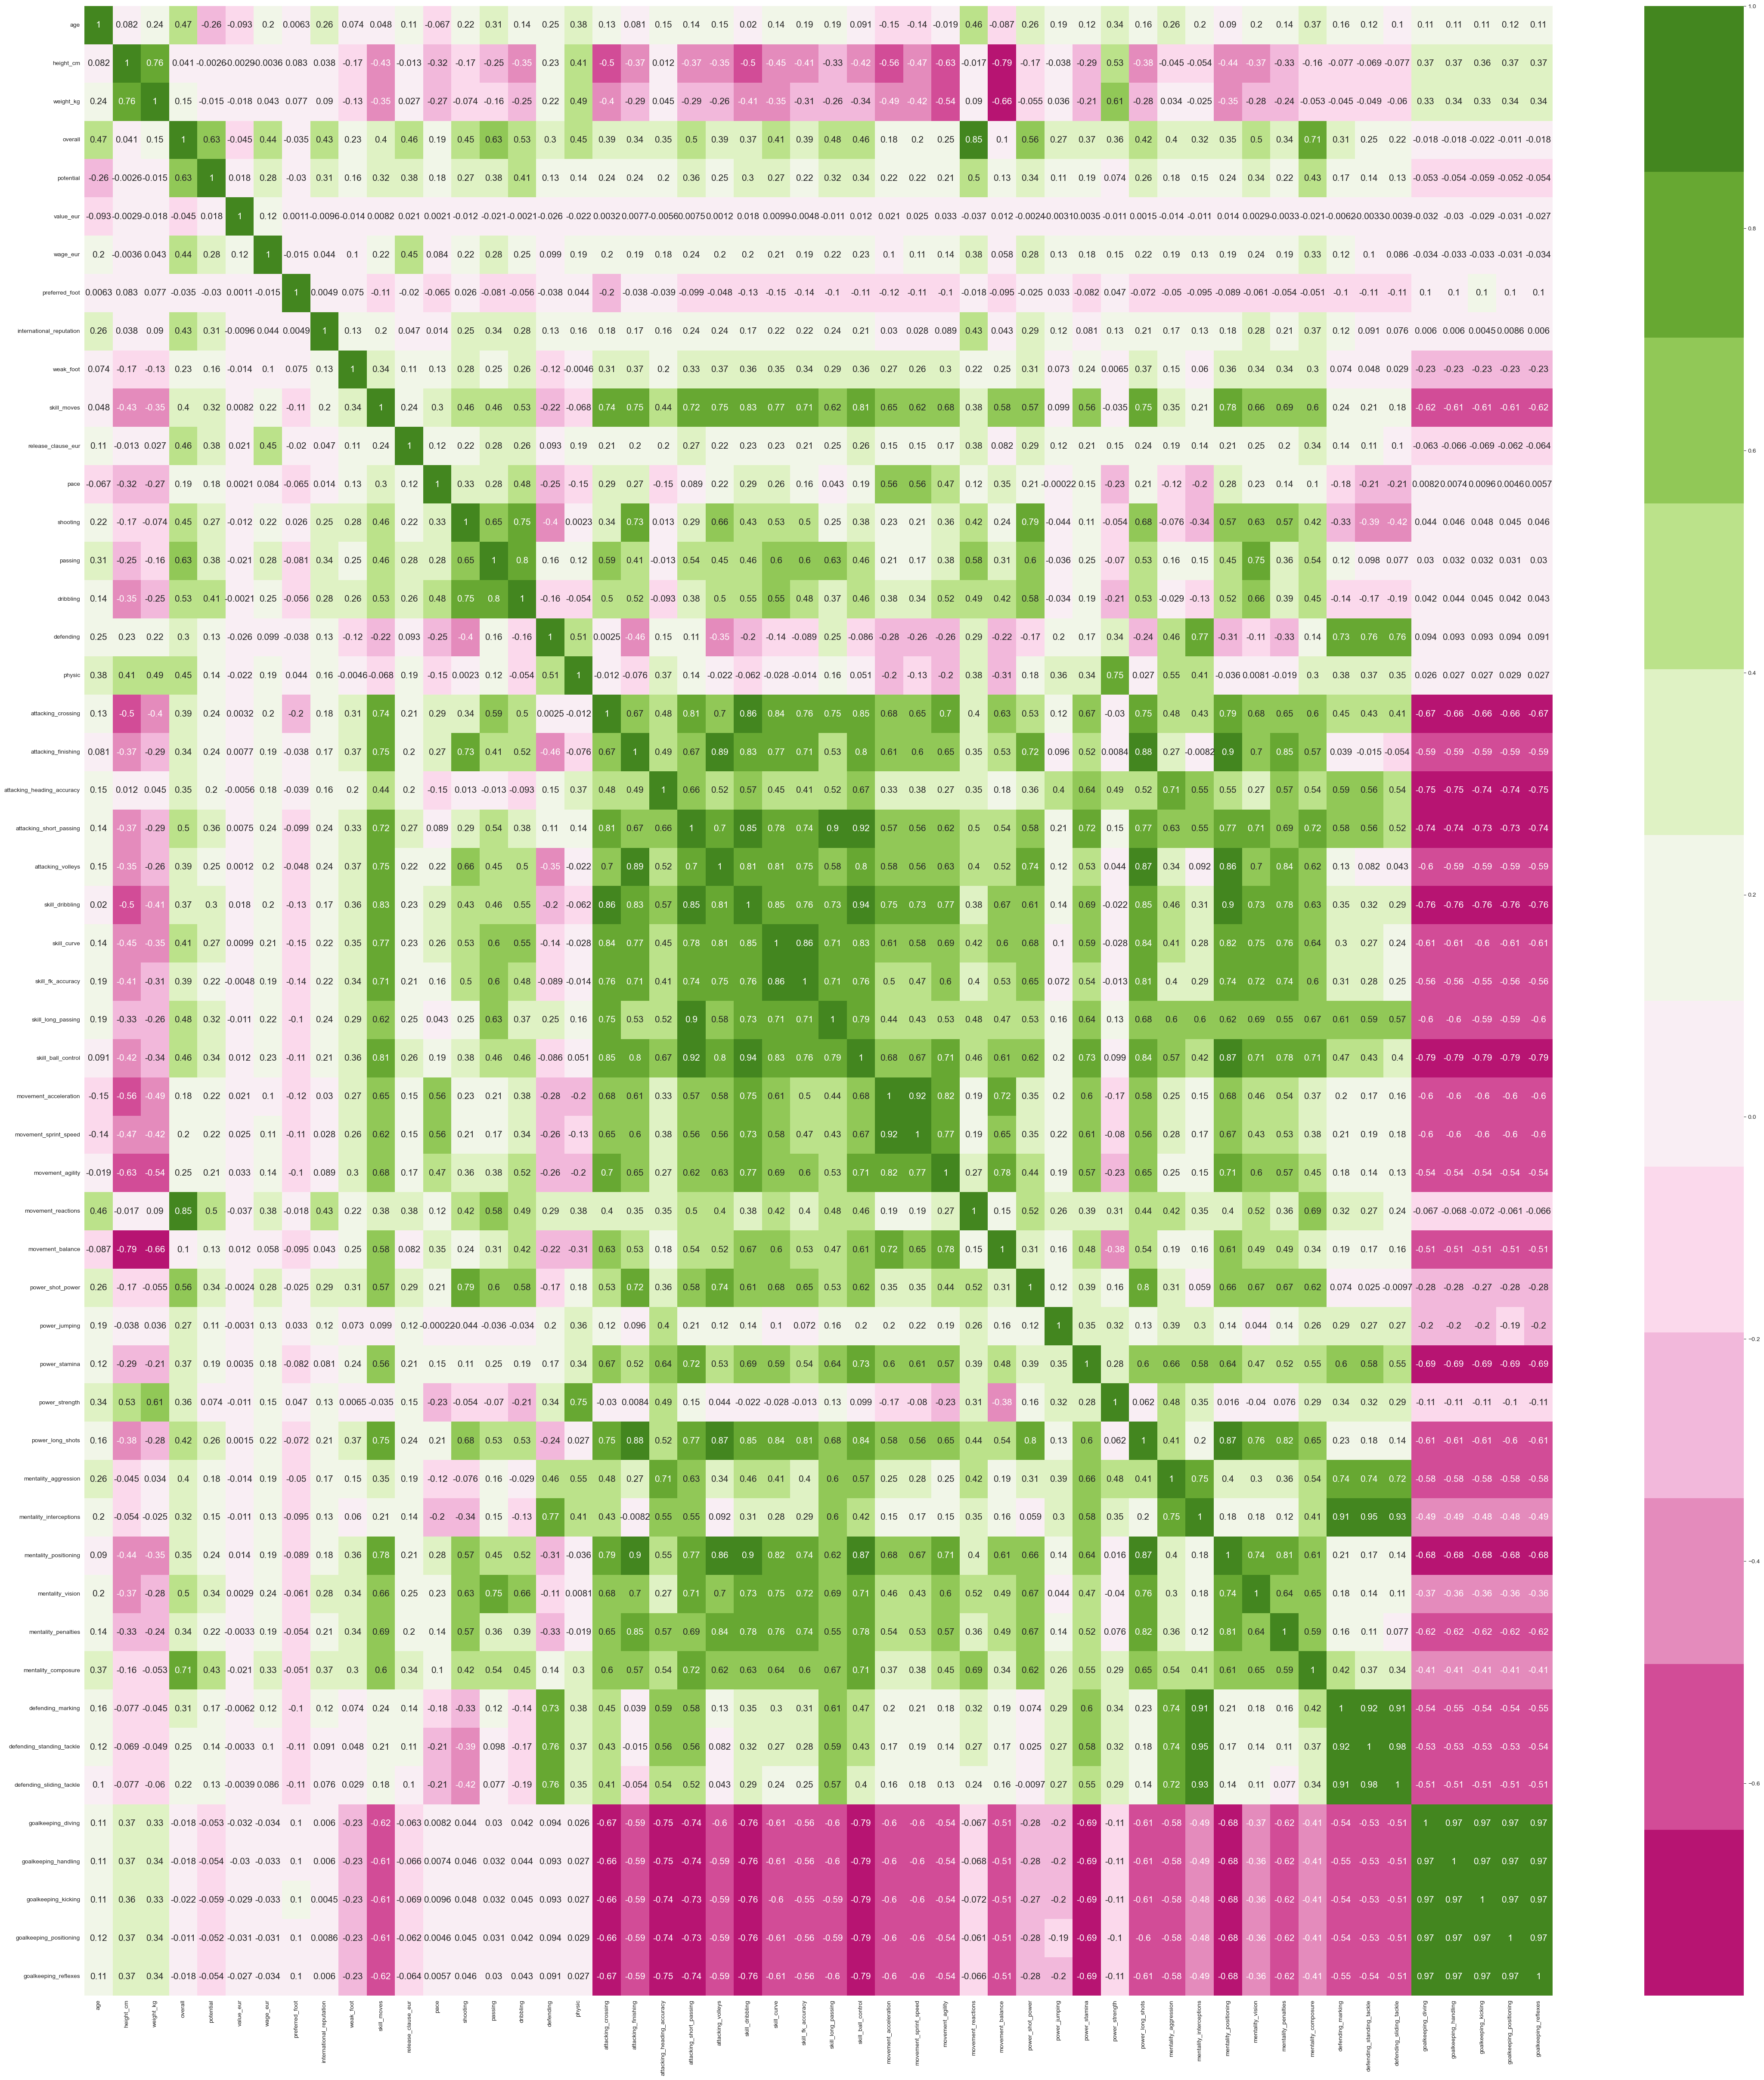

In [76]:
# Plot hitmap for better visualisation
plt.figure(figsize=(55,60))
sns.heatmap(data.corr(),annot=True,cmap=sns.color_palette("PiYG", 12),annot_kws={"size":15})
plt.show()

- From the above heatmap is very difficult to find highly correlated feature so we are create a python code to check the highly corelated feature

In [77]:
# To get highly corelated feature
pd.set_option('display.max_rows',None)
corrmat = data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

feature1                   feature2      corr
0    defending_sliding_tackle  defending_standing_tackle  0.975808
1   defending_standing_tackle   defending_sliding_tackle  0.975808
2        goalkeeping_reflexes         goalkeeping_diving  0.973922
3          goalkeeping_diving       goalkeeping_reflexes  0.973922
4        goalkeeping_handling         goalkeeping_diving  0.971330
5          goalkeeping_diving       goalkeeping_handling  0.971330
6        goalkeeping_reflexes       goalkeeping_handling  0.971244
7        goalkeeping_handling       goalkeeping_reflexes  0.971244
8     goalkeeping_positioning         goalkeeping_diving  0.971218
9          goalkeeping_diving    goalkeeping_positioning  0.971218
10       goalkeeping_reflexes    goalkeeping_positioning  0.971060
11    goalkeeping_positioning       goalkeeping_reflexes  0.971060
12    goalkeeping_positioning       goalkeeping_handling  0.970517
13       goalkeeping_handling    goalkeeping_positioning  0.970517
14       goalkeeping_reflexes        goalkeeping_kicking  0.967866
15        goalkeeping_kicking       goalkeeping_reflexes  0.967866
16         goalkeeping_diving        goalkeeping_kicking  0.967057
17        goalkeeping_kicking         goalkeeping_diving  0.967057
18       goalkeeping_handling        goalkeeping_kicking  0.966508
19        goalkeeping_kicking       goalkeeping_handling  0.966508
20        goalkeeping_kicking    goalkeeping_positioning  0.966061
21    goalkeeping_positioning        goalkeeping_kicking  0.966061
22  defending_standing_tackle    mentality_interceptions  0.945287
23    mentality_interceptions  defending_standing_tackle  0.945287
24            skill_dribbling         skill_ball_control  0.943461
25         skill_ball_control            skill_dribbling  0.943461
26   defending_sliding_tackle    mentality_interceptions  0.933894
27    mentality_interceptions   defending_sliding_tackle  0.933894
28      movement_acceleration      movement_sprint_speed  0.923721
29      movement_sprint_speed      movement_acceleration  0.923721
30          defending_marking  defending_standing_tackle  0.918593
31  defending_standing_tackle          defending_marking  0.918593
32    attacking_short_passing         skill_ball_control  0.917721
33         skill_ball_control    attacking_short_passing  0.917721
34   defending_sliding_tackle          defending_marking  0.909153
35          defending_marking   defending_sliding_tackle  0.909153
36    mentality_interceptions          defending_marking  0.907401
37          defending_marking    mentality_interceptions  0.907401
38      mentality_positioning            skill_dribbling  0.904501
39            skill_dribbling      mentality_positioning  0.904501

In [78]:
data.drop(['defending_standing_tackle','goalkeeping_diving','goalkeeping_handling',
           'goalkeeping_positioning','goalkeeping_reflexes','mentality_interceptions','skill_ball_control',
           'movement_sprint_speed','defending_marking','mentality_positioning','attacking_short_passing'],axis=1,inplace=True)

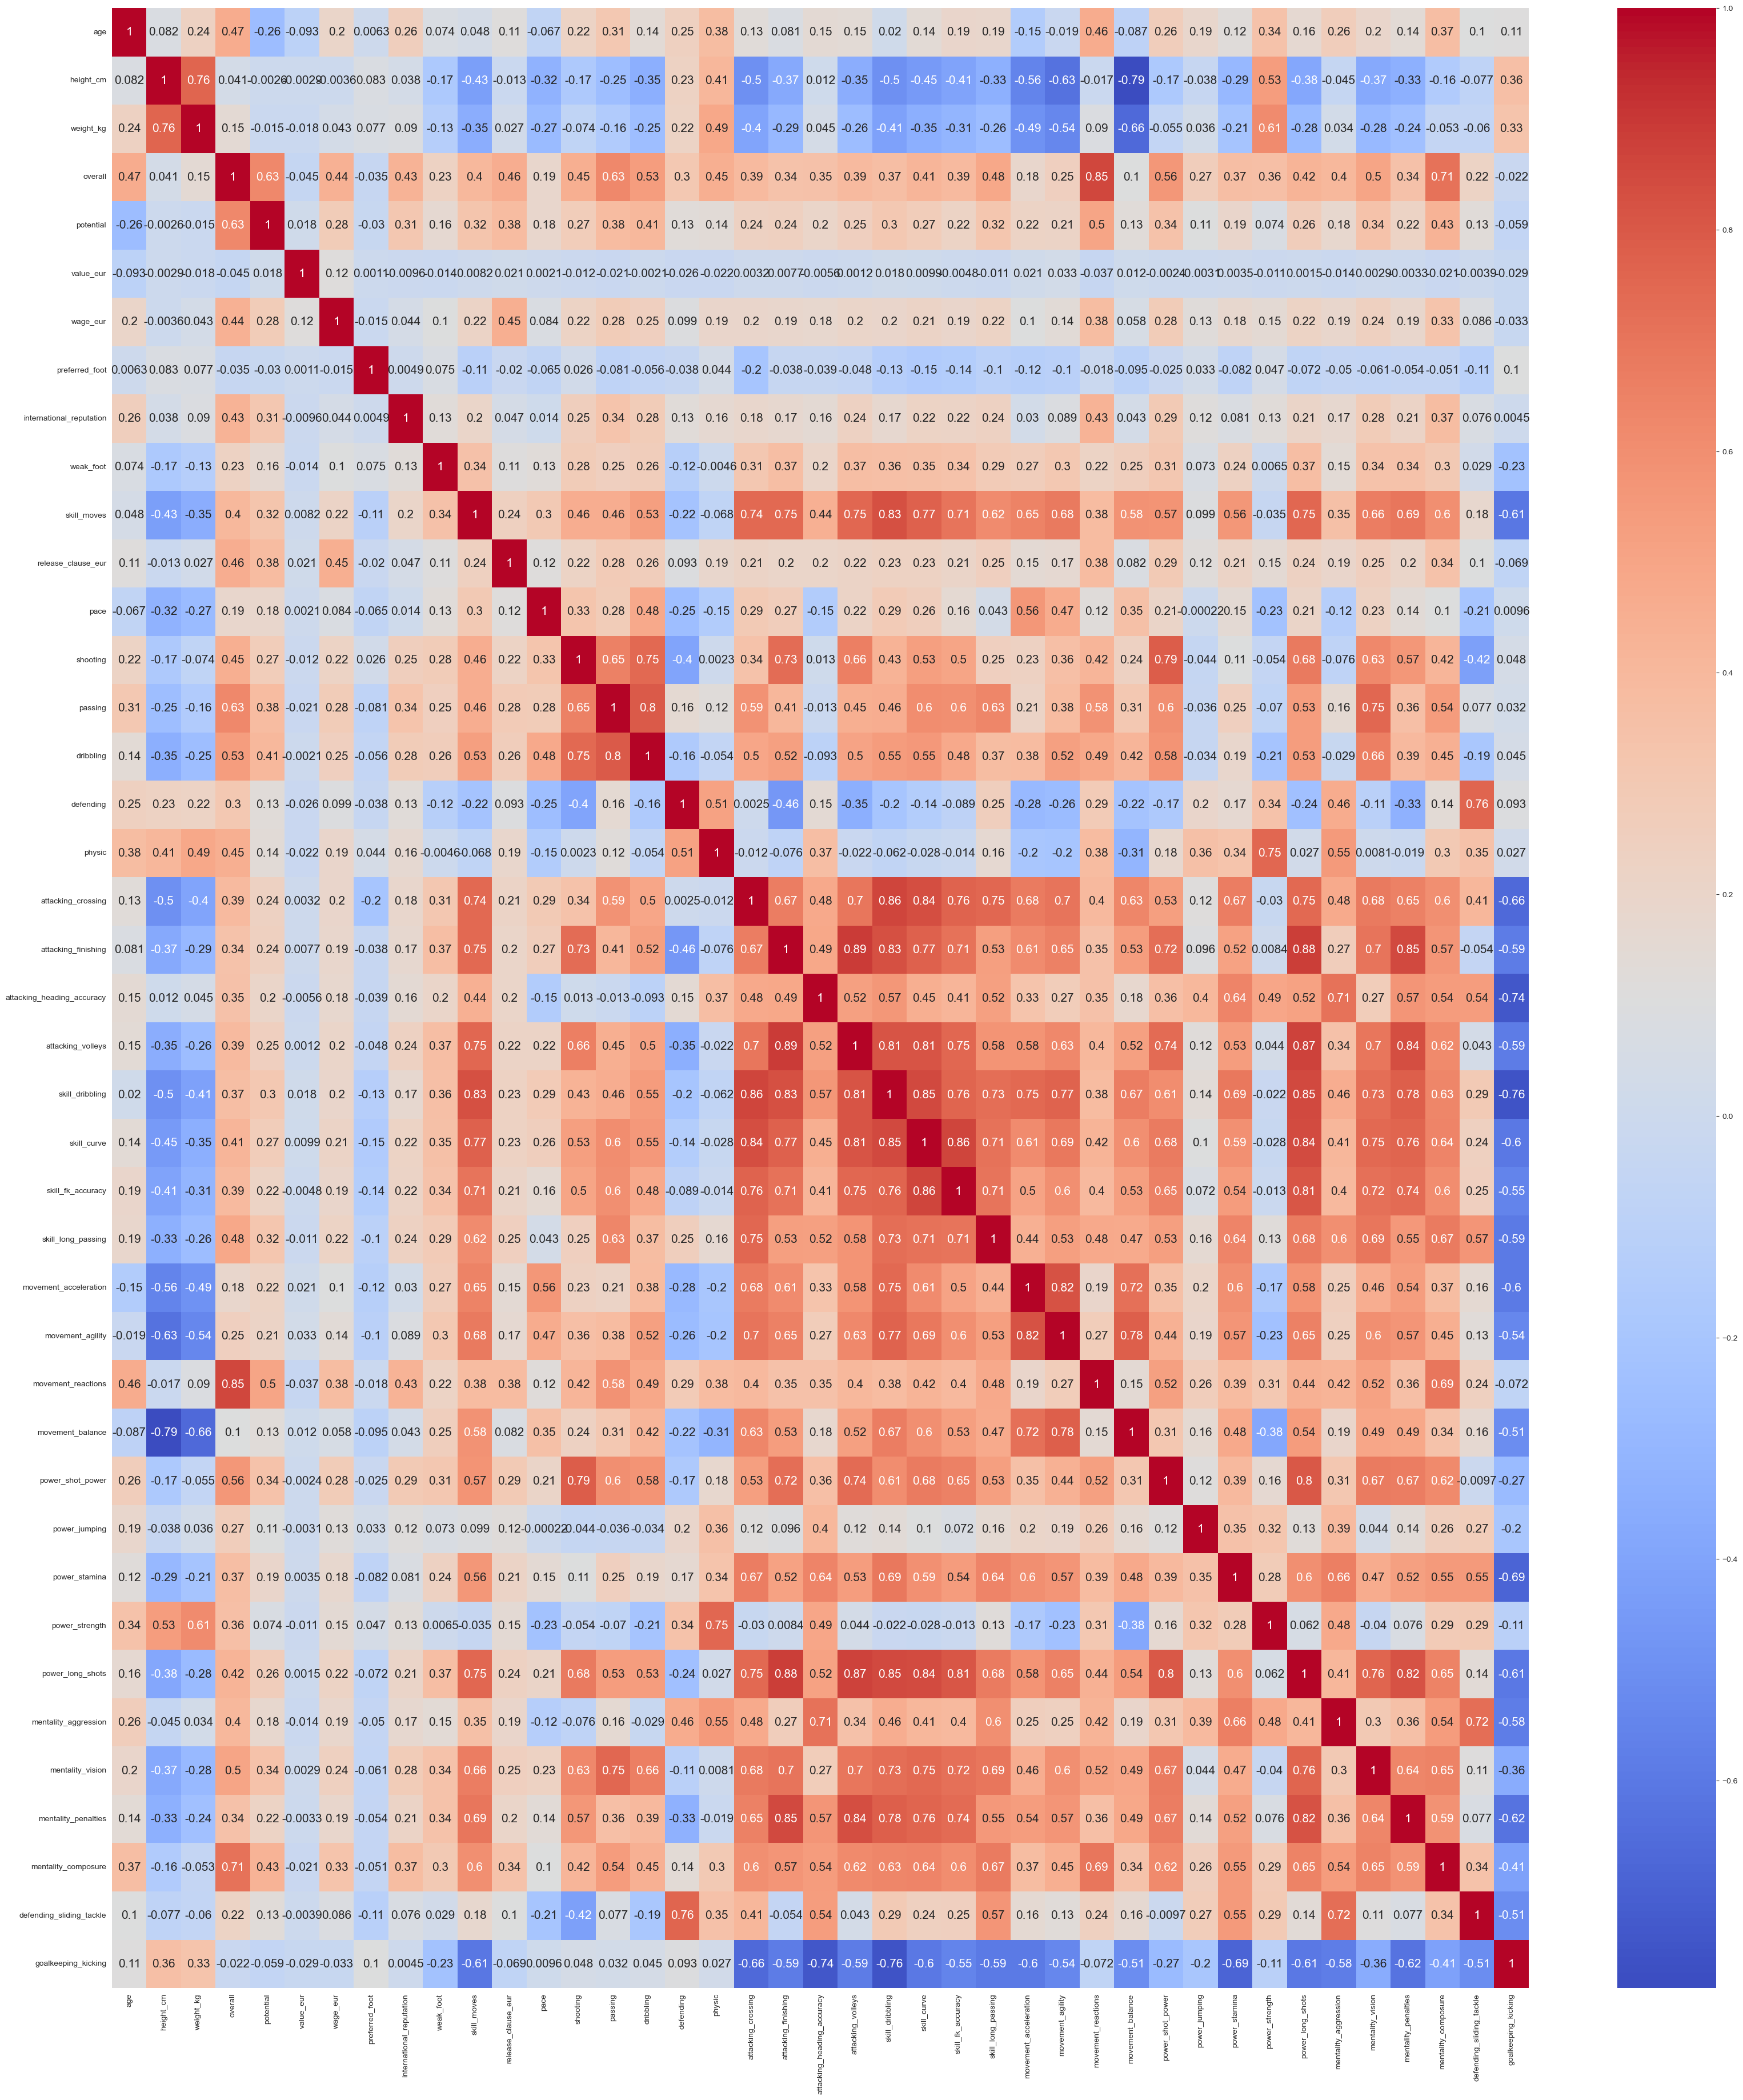

In [79]:
# Plot hitmap for after drop highly correlated feature better visualisation
plt.figure(figsize=(40,45))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm",annot_kws={"size":15})
plt.show()

### 3.CHECKING DUPLICATES

In [80]:
data.duplicated().sum()

0

- Their is no duplicate present in data

### 4.SAVE & LOAD THE PREPROCESS DATA

In [81]:
# Save the dataframe to a CSV file
data.to_csv('fifa20PreprocessData.csv', index=False)


In [83]:
preprocess_data = pd.read_csv("fifa20PreprocessData.csv")
preprocess_data.head()

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
0  0.695652   0.205128   0.414634  0.46782    0.50134        1.0  0.166667   
1  0.782609   0.641026   0.682927  0.46782    0.50134        1.0  0.166667   
2  0.478261   0.333333   0.317073  0.46782    0.50134        1.0  0.166667   
3  0.434783   0.666667   0.780488  0.46782    0.50134        1.0  0.166667   
4  0.521739   0.333333   0.463415  0.46782    0.50134        1.0  0.166667   

   preferred_foot  international_reputation  weak_foot  skill_moves  \
0               0                         5          4            4   
1               1                         5          4            5   
2               1                         5          5            5   
3               1                         3          3            1   
4               1                         4          4            4   

   release_clause_eur  team_position      pace  shooting   passing  dribbling  \
0             0.16749              9  0.930233  0.513889  1.000000   0.503424   
1             0.16749             10  1.000000  0.513889  0.852941   0.964912   
2             0.16749             16  0.511628  0.944444  0.926471   0.503424   
3             0.16749             26  0.511628  0.513889  0.500000   0.526316   
4             0.16749             10  0.511628  0.916667  0.911765   0.503424   

   defending    physic  attacking_crossing  attacking_finishing  \
0   0.320000  0.511628            0.943182             1.000000   
1   0.266667  0.790698            0.897727             0.989247   
2   0.226667  0.325581            0.931818             0.913978   
3   0.546667  0.511628            0.090909             0.096774   
4   0.266667  0.511628            0.863636             0.881720   

   attacking_heading_accuracy  attacking_volleys  skill_dribbling  \
0                    0.738636           0.977011         1.000000   
1                    0.954545           0.965517         0.913978   
2                    0.647727           0.965517         0.989247   
3                    0.113636           0.114943         0.086022   
4                    0.636364           0.919540         0.978495   

   skill_curve  skill_fk_accuracy  skill_long_passing  movement_acceleration  \
0     0.988636           1.000000            1.000000               0.929412   
1     0.852273           0.800000            0.821429               0.905882   
2     0.931818           0.922222            0.869048               0.964706   
3     0.079545           0.111111            0.380952               0.364706   
4     0.875000           0.833333            0.892857               0.964706   

   movement_agility  movement_reactions  movement_balance  power_shot_power  \
0          0.964706            0.986667          0.976471          0.888889   
1          0.894118            1.000000          0.694118          1.000000   
2          1.000000            0.946667          0.847059          0.814815   
3          0.658824            0.893333          0.435294          0.555556   
4          0.988235            0.920000          0.964706          0.839506   

   power_jumping  power_stamina  power_strength  power_long_shots  \
0       0.644737       0.741176        0.623377          1.000000   
1       1.000000       0.858824        0.753247          0.988889   
2       0.552632       0.811765        0.376623          0.888889   
3       0.776316       0.341176        0.753247          0.088889   
4       0.486842       0.847059        0.558442          0.844444   

   mentality_aggression  mentality_vision  mentality_penalties  \
0              0.453488          1.000000             0.800000   
1              0.627907          0.858824             0.917647   
2              0.488372          0.952941             0.976471   
3              0.290698          0.658824             0.047059   
4              0.523256          0.941176             0.952941   

   mentality_composure  defending_slidi

### 5.PCA(PRINCIPLE COMPONENET ANALYSIS)
- Use to reduce the feature

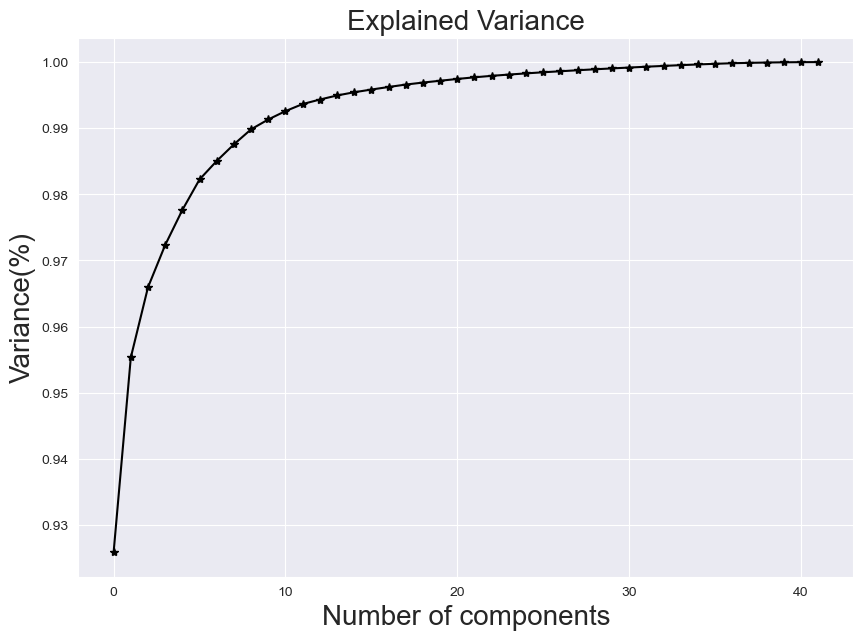

In [84]:
from sklearn.decomposition import PCA
pca = PCA()
principlecomponents = pca.fit_transform(data)
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='*',color='k') #plot the variance ratio
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20)
plt.title('Explained Variance',fontsize=20)
plt.show()

- Here we are select 10 components because less variance loss

In [86]:
# Step:2 Select the components
pca = PCA(n_components=10)
fifa = pca.fit_transform(data)

# Step:3 Make new dataframe
pca_df = pd.DataFrame(data=fifa,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10'])
pca_df.head()

pca1      pca2      pca3      pca4      pca5      pca6      pca7  \
0  15.457910  1.970933 -0.127109  1.245770  0.292933  2.606723  2.050659   
1  14.499303  2.579694 -0.087924  1.460932  1.355166  2.141632  1.915058   
2   8.525502  3.366463 -0.935640  0.974871  1.135822  2.192465  2.284827   
3  -1.791257 -1.366833 -0.823411  0.942989  0.671947  1.593489  0.847568   
4  14.442166  1.785358 -0.369839  0.776535  0.970577  1.640868  1.535269   

       pca8      pca9     pca10  
0 -0.313811  0.706056  0.287503  
1  0.534549  0.771055  0.385453  
2  0.295146  0.648785  0.073268  
3 -0.074798 -0.091278  0.273977  
4 -0.185057  0.623712  0.125529

In [87]:
# Save the dataframe to a CSV file
pca_df.to_csv('PCA_Data.csv', index=False)

#### ---------------------------------------------------------------------------------------------- Thank You ------------------------------------------------------------------------------------------